In [515]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [516]:
df = pd.read_csv('HR Analytics.csv')
pd.set_option('display.max_columns', None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [517]:
df.shape

(1470, 35)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observations: 

    There are visibliy no null values in the dataset. 
    
    Almost all the values are categorical, but still numerical. 

In [519]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [520]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [521]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [522]:
df['StandardHours'].unique()

array([80], dtype=int64)

'Over18', 'EmployeeCount' and 'StandardHours' columns has only one entry, and encoding this will turn this to '0', which won't have any affect on any other columns. Hence this can be removed. 

### Removing unwanted columns. 

In [523]:
df.drop('Over18', inplace = True, axis = 1)

In [524]:
df.drop('EmployeeCount', inplace = True, axis = 1)

In [525]:
df.drop('StandardHours', inplace = True, axis = 1)

In [526]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [527]:
col = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

categ_col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 
             'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
            'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

numer_col = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike']

### Univariate Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64


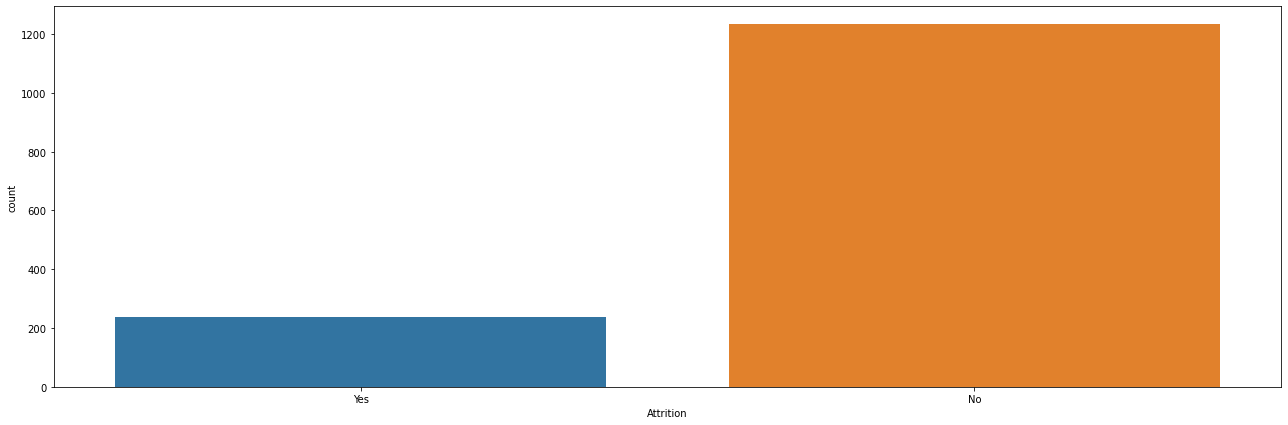

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


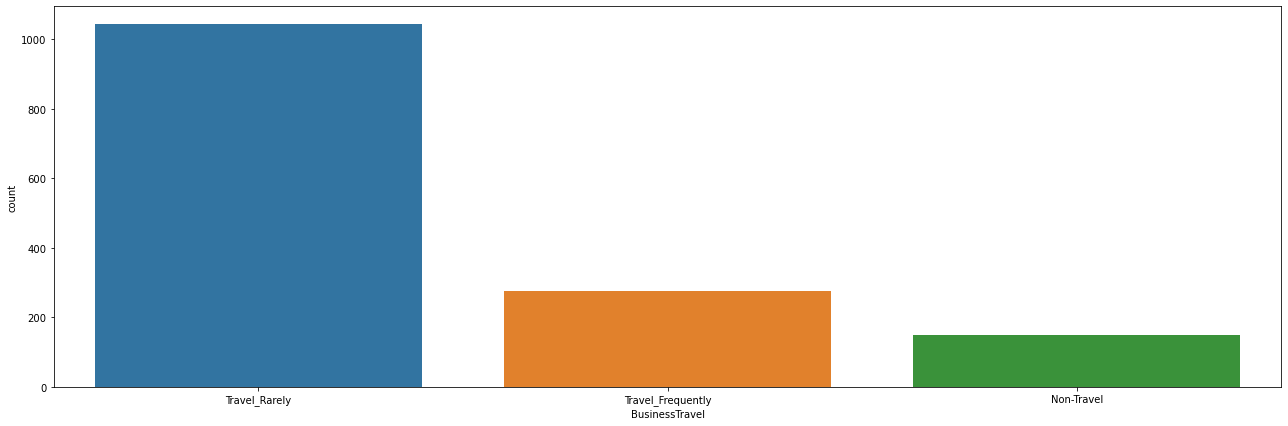

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


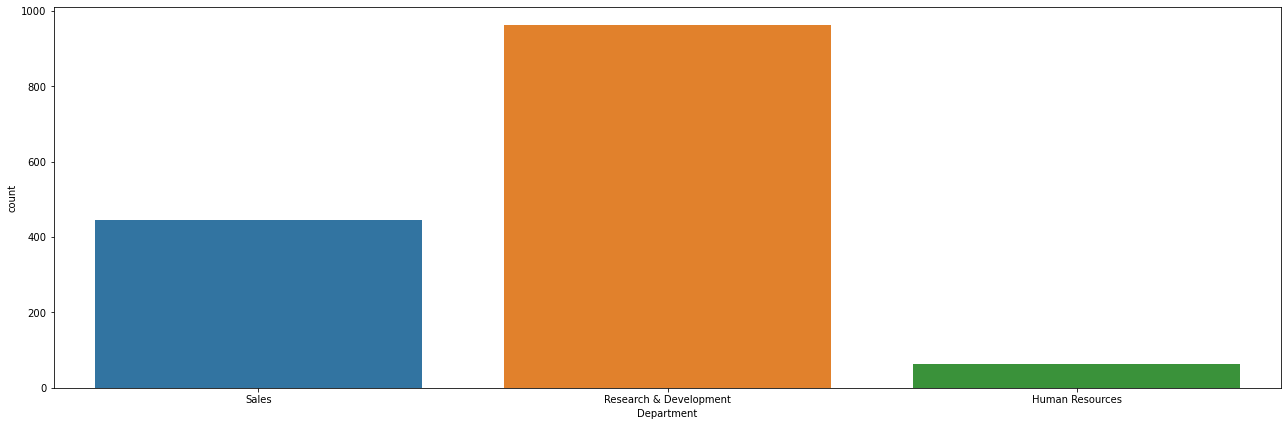

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


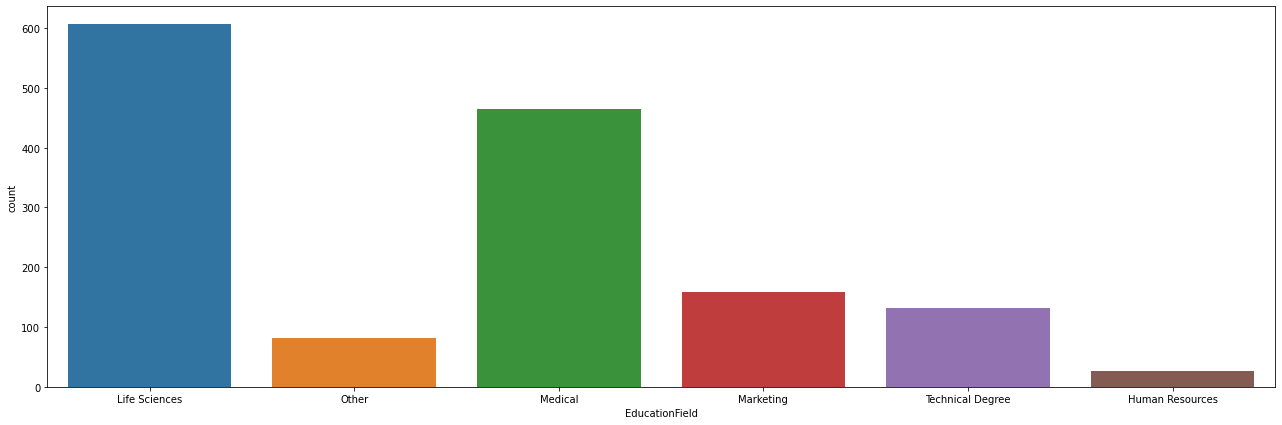

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


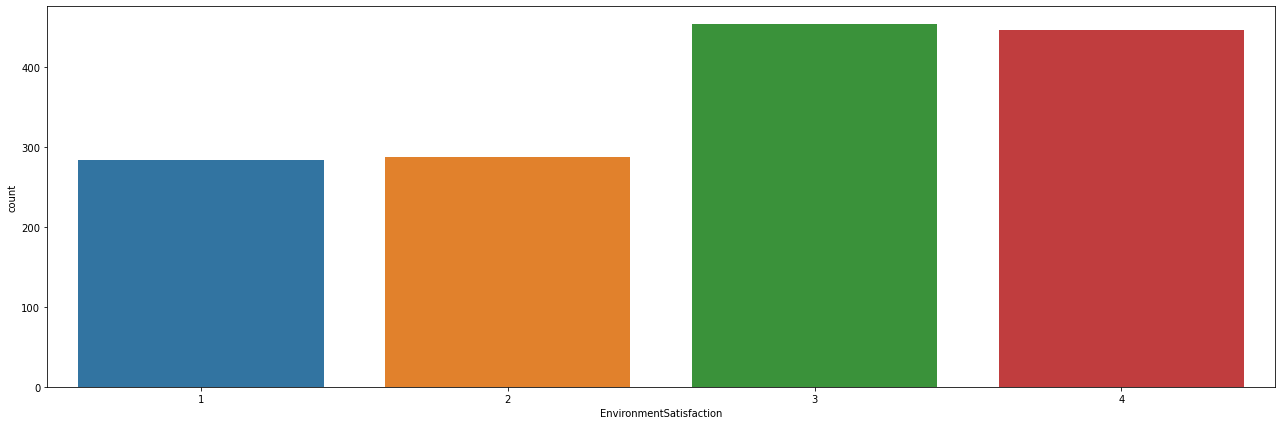

Male      882
Female    588
Name: Gender, dtype: int64


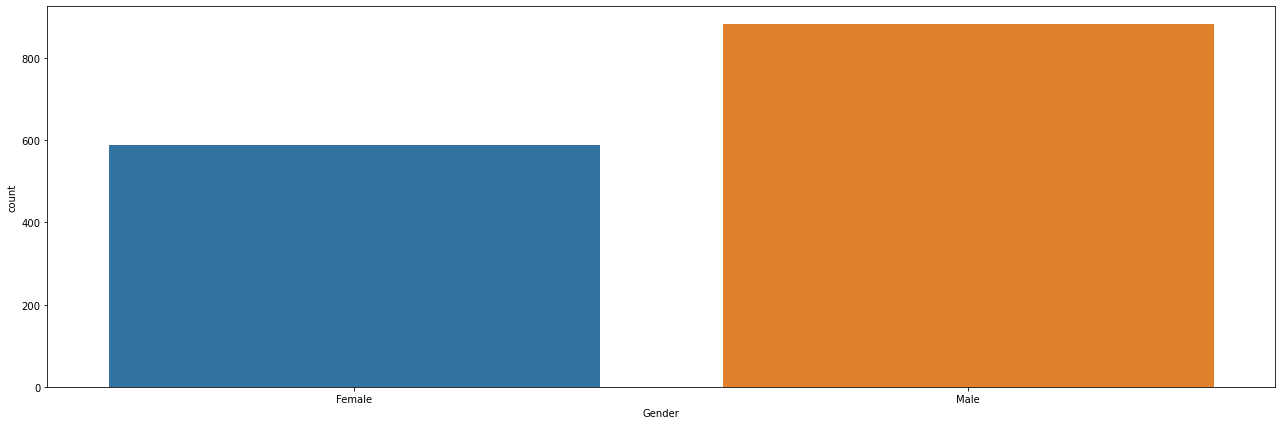

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


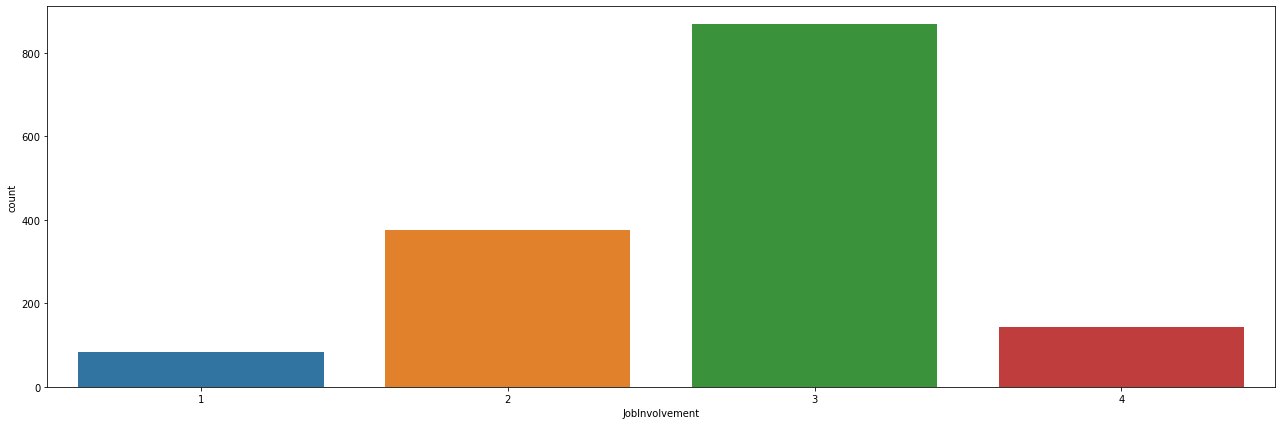

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


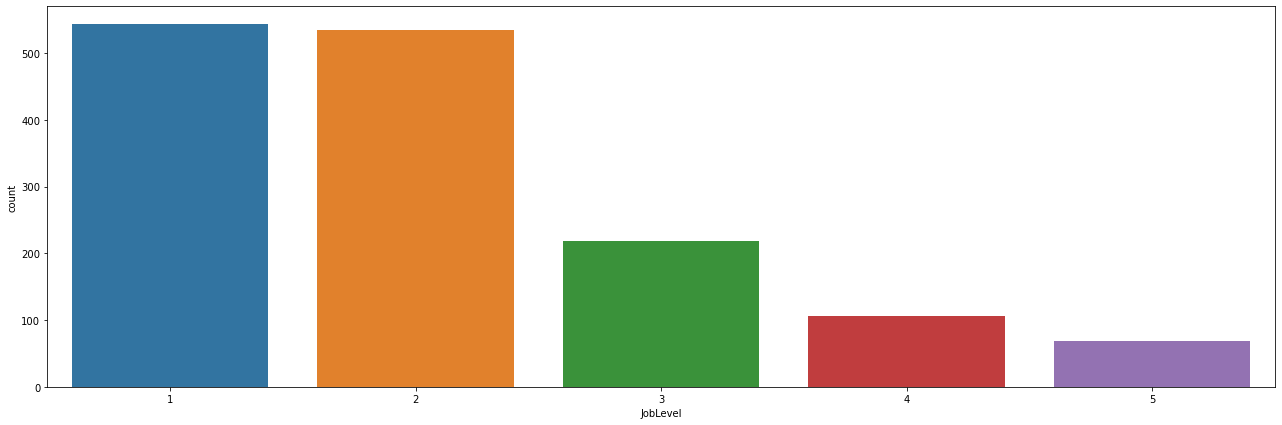

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


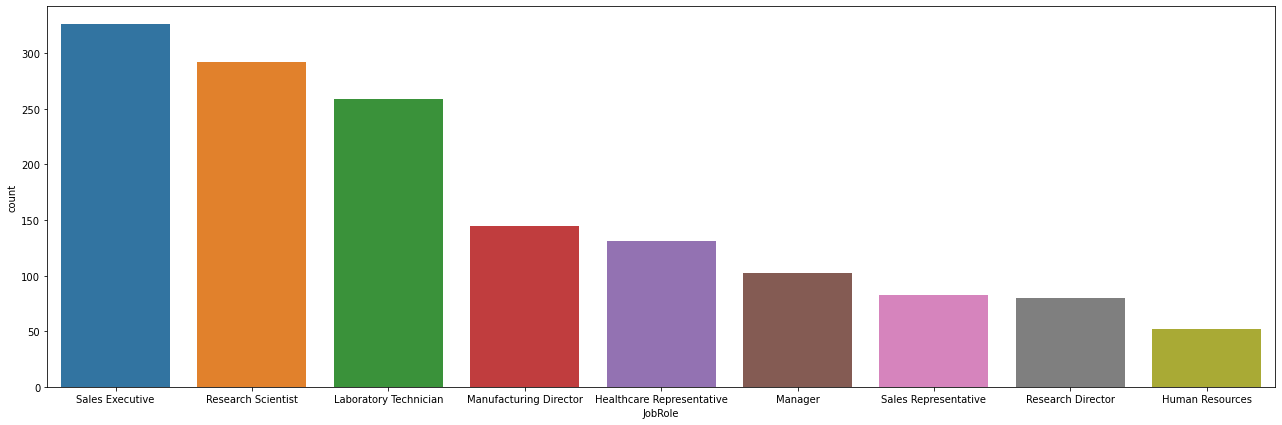

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


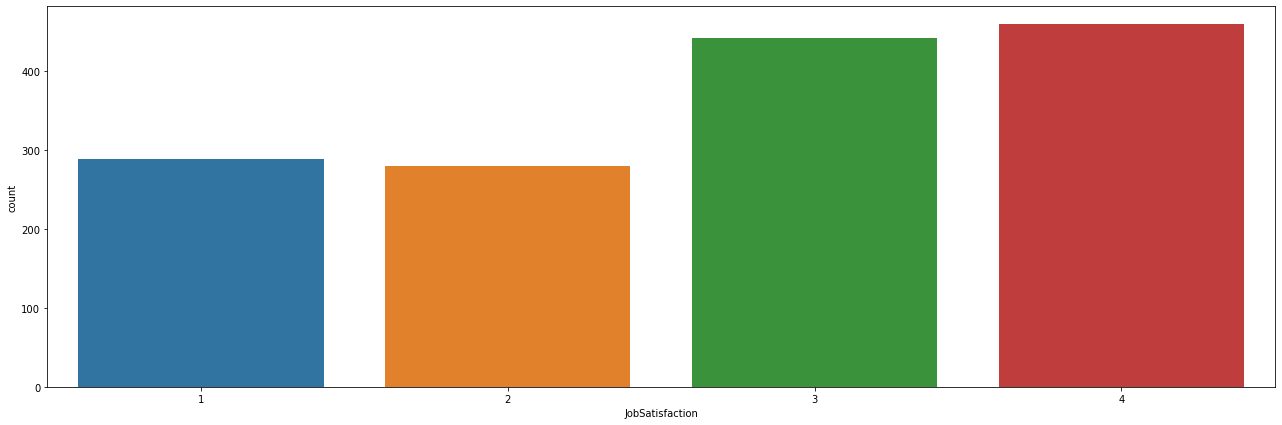

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


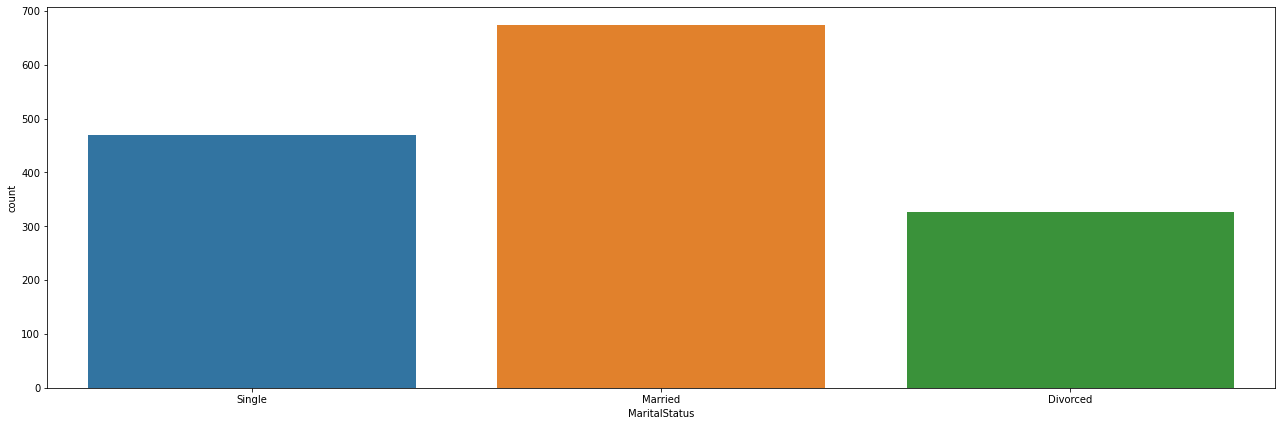

No     1054
Yes     416
Name: OverTime, dtype: int64


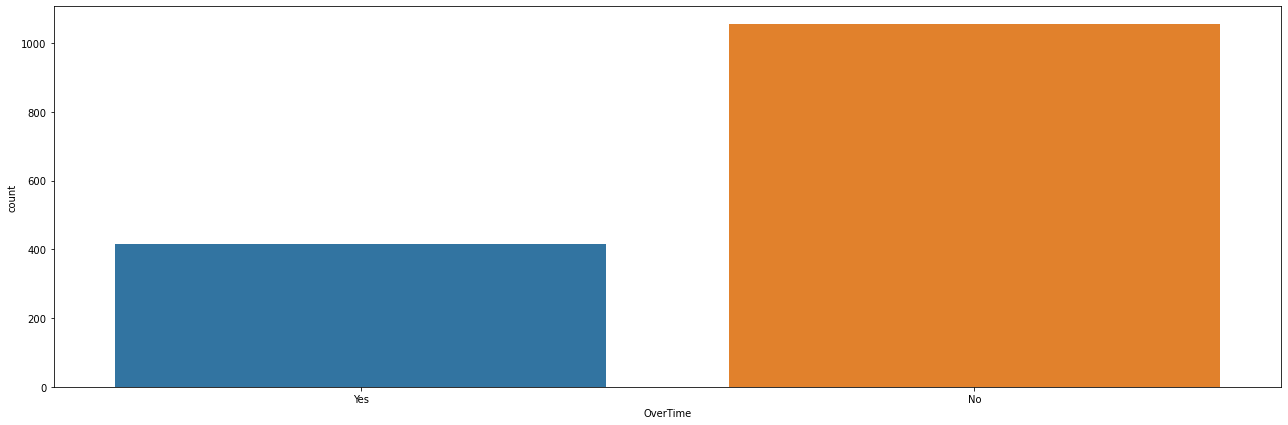

3    1244
4     226
Name: PerformanceRating, dtype: int64


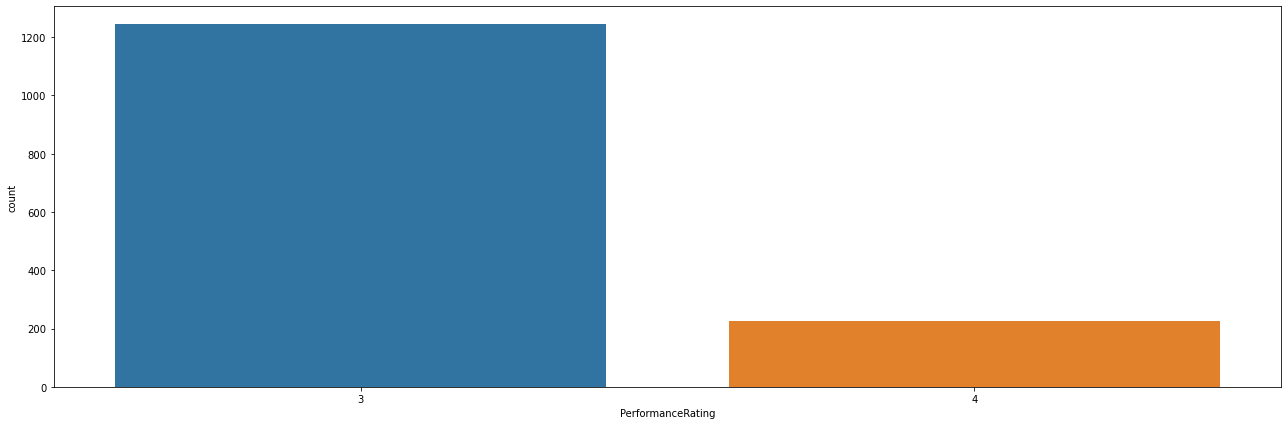

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


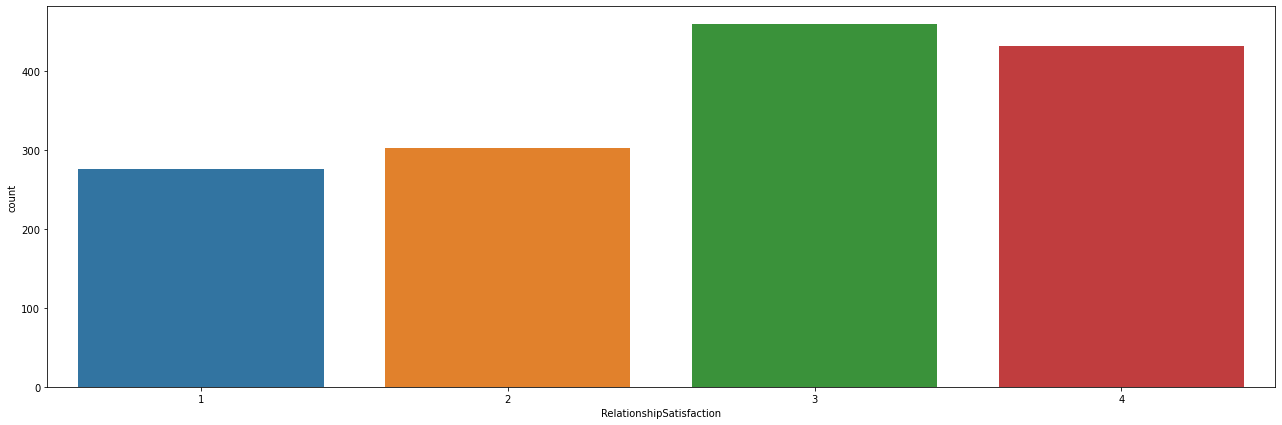

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


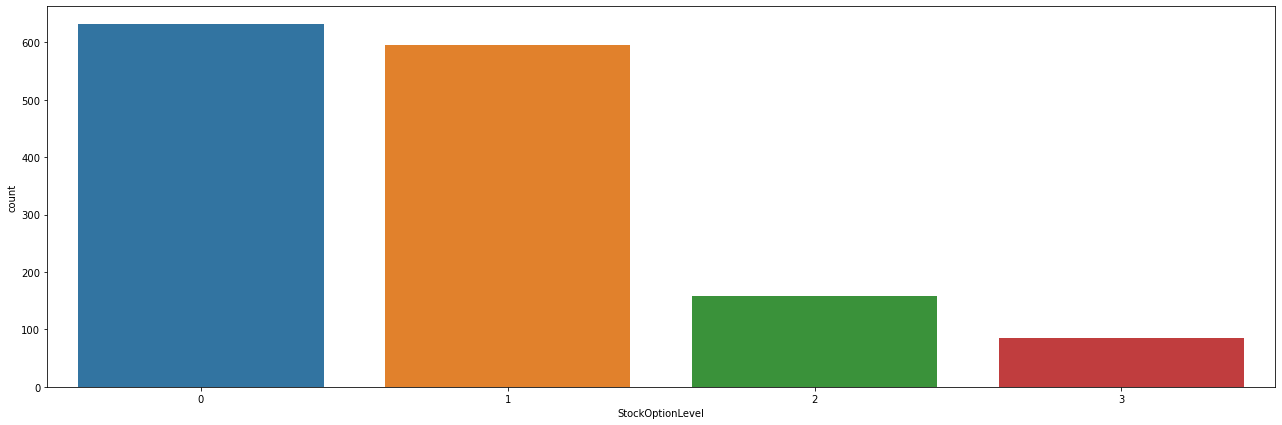

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


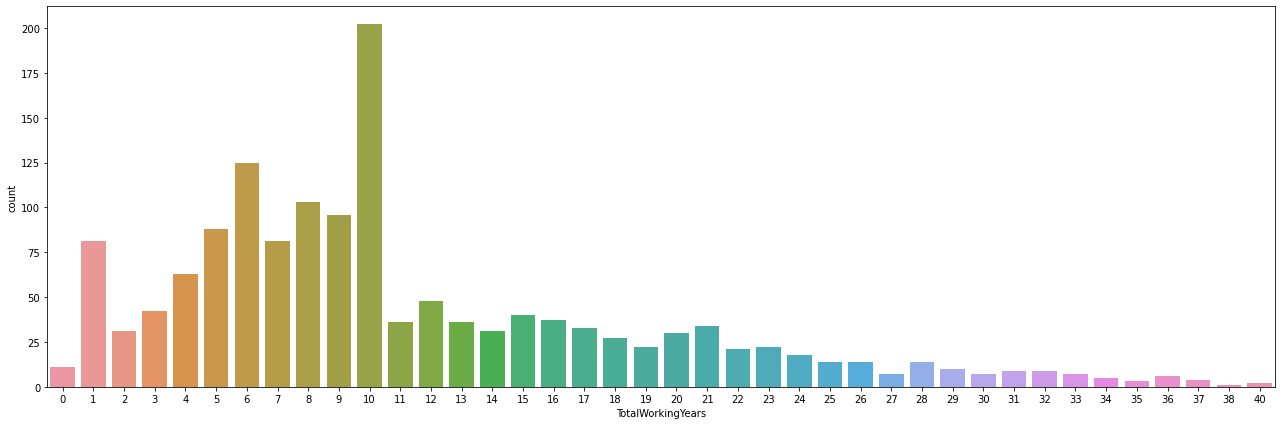

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


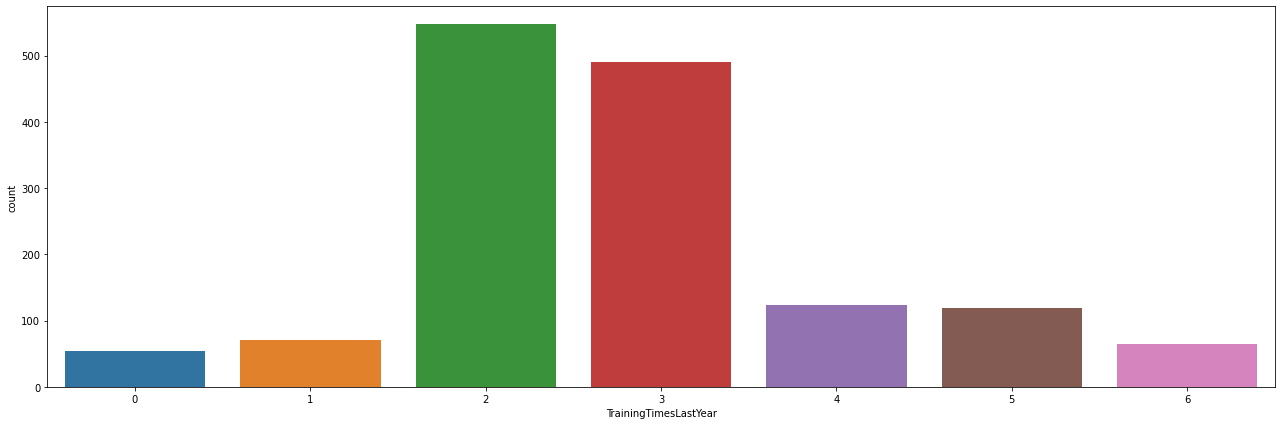

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


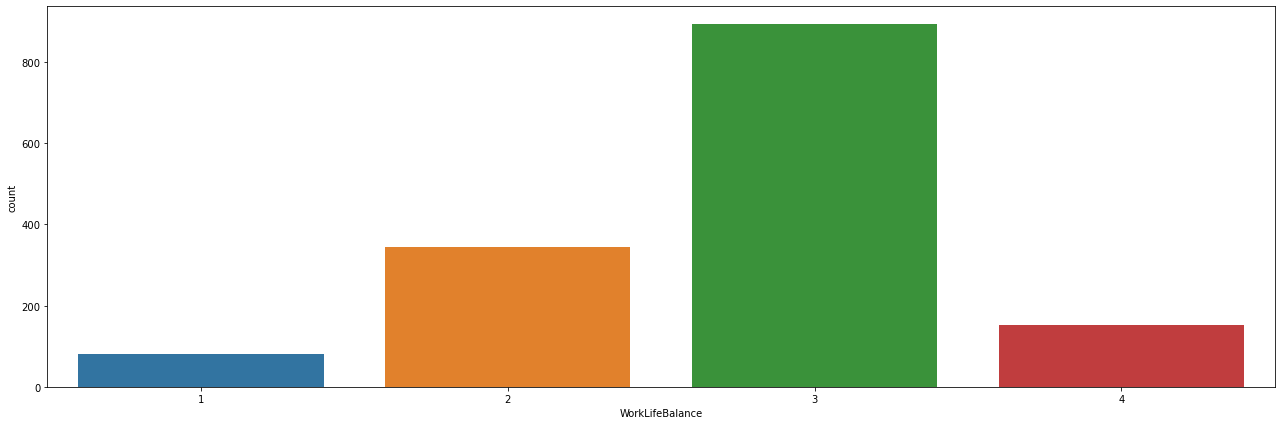

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
29      2
27      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64


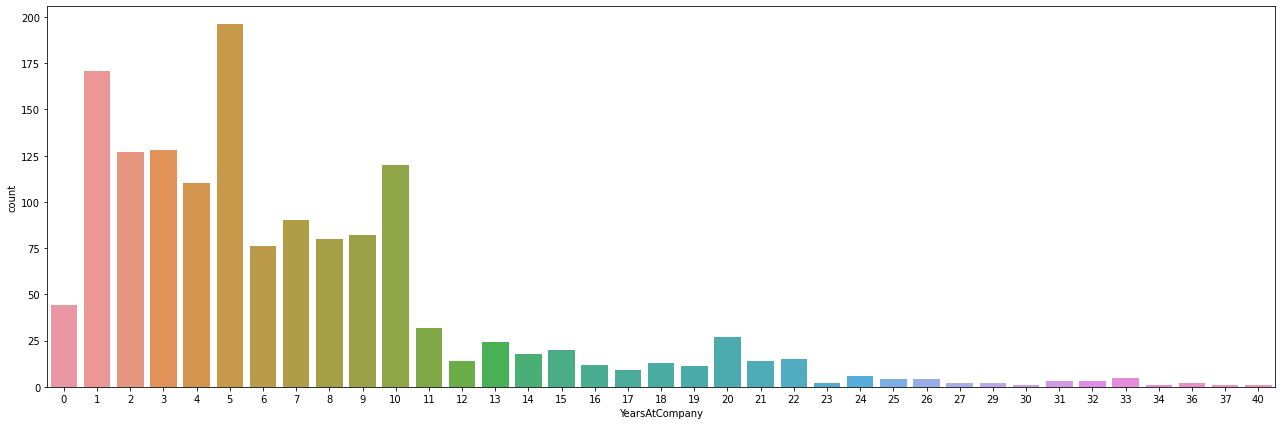

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


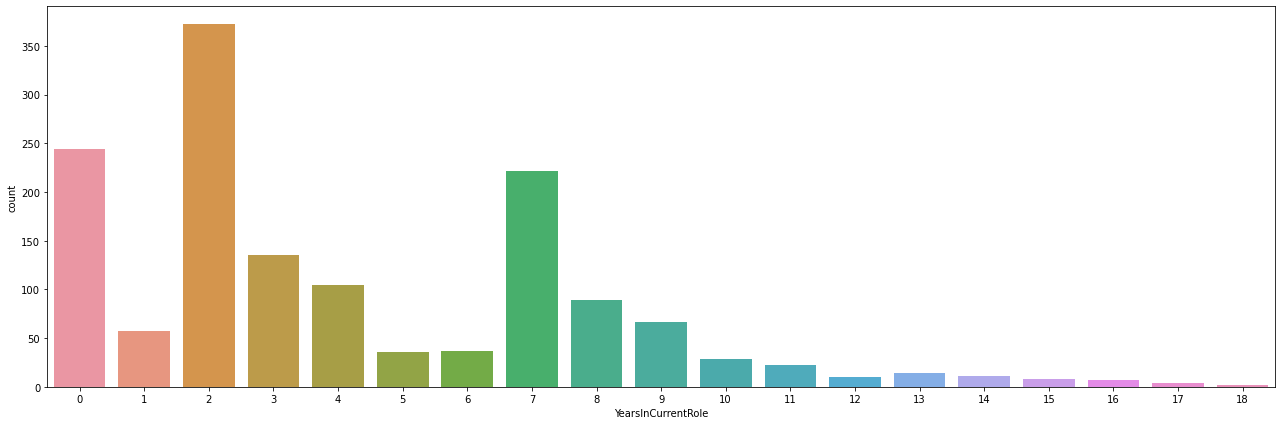

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


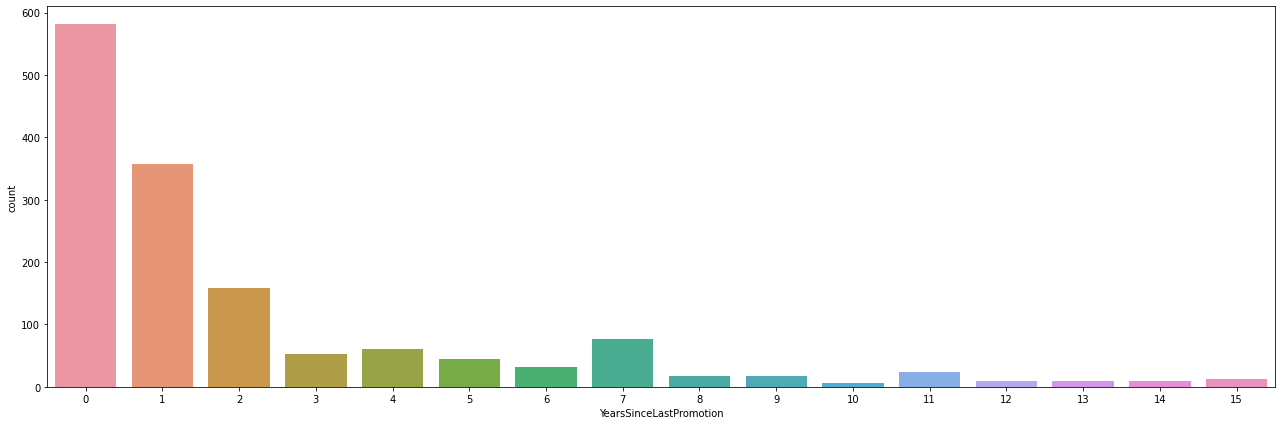

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64


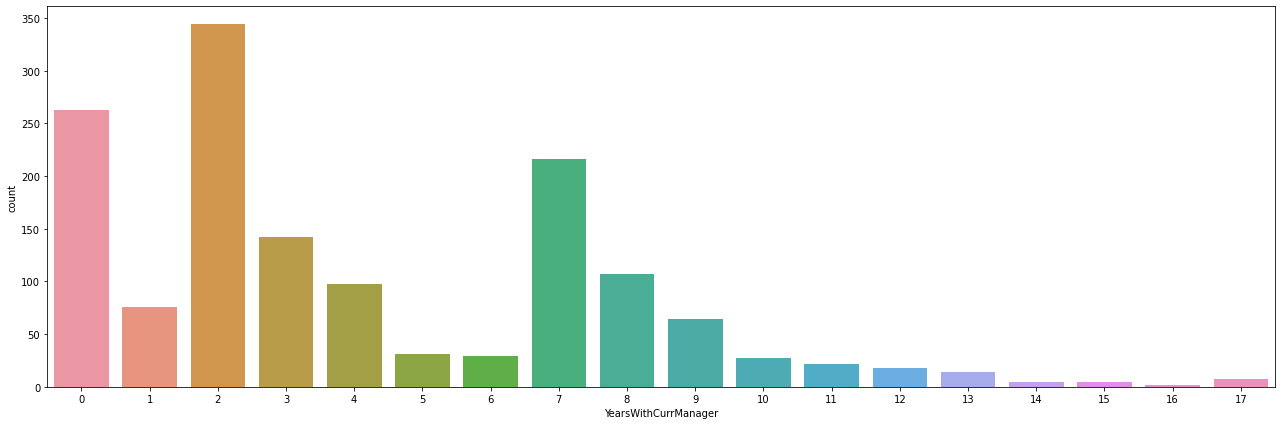

In [528]:
for i in categ_col:
    plt.figure(figsize = (22,7))
    ax = sb.countplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()

Observation: 
    
    The number of employess who might exit due to attrition is 237.
    
    A lot of the employess travel rarely, and some do it frequently. The number of employess who doesn't travel at all is very less. 
    
    The highest number of people are in Research & Developement, followed by sales. The lowest is in HR. 
    
    The highest number of peopele working in this company has 'Lige Science' education, followed by 'Medical', and others. 
    
    Highest numbr of employess are not satisfied or are moderatley satisfied with the work environment. 
    
    The highest number of employees are men. 
    
    Employess who votes for the most and least job involvement are really low. The people who voted 2 is low, and 3 is the highest. This doesn't give a good picture of the work environment. 
    
    The highest number of people are working in Level 1 & Level 2 jobs. 
    
    Sales Executive, Research Scientist, and Laboratory Technician jobroles has the highest number of people working in it. We'll have to check how the attrition affects these roles. 
    
    Highest number of people has poor or average (3,4) ratings for Job satisfaction. However, there are a good number of people who are really satisfied with their work, or happy with it atleats. 
    
    The highest number of employess are married, followed by a big group of singles, and a good percentage of divorced people.
    
    Only 416 people reported to be doing over time. 
    
    Perfomance rating of only 3 & 4 are available in the dataset. Most of the people has been voted 3, while 226 people has been voted 4/poor performers. 
    
    When it comes to relationship satisfaction, most of the people are not satisfied. Howeever, there are people who has voted 1 and 2 for this category. 
    
    he highest number of people are getting Stock option levels 1 & 2. There are only a small number of people getting the level 3 option. 
    
    The number of employees working from 0-10 year increases exponentially, then drecrease as each year passes. 
    
    The highest numbre of employees has received 2-3 units of traning last year. 
    
    The highest number of people reported poor Work life balance. 
    
    Once an employee reaches upto 1 year in the company, the chances are high that this person might stay upto 10 years. After that, most of the people choose to leave. 
    
    Most of the people chooses to stay in the current role for 0, 2 or 7 years. 
    
    Most of the employess get promoted once within 2 years. 

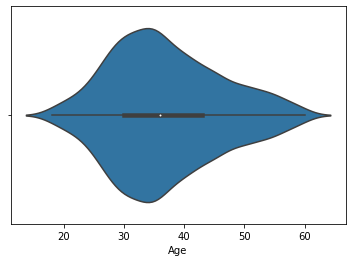

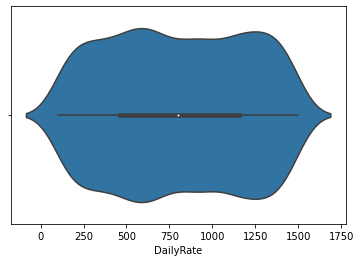

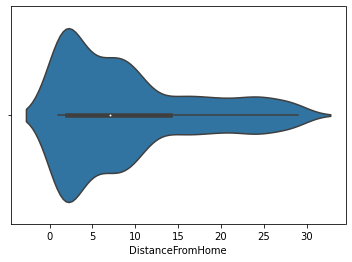

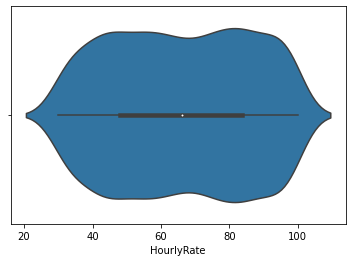

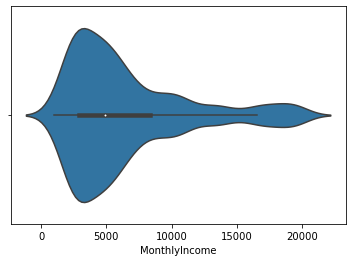

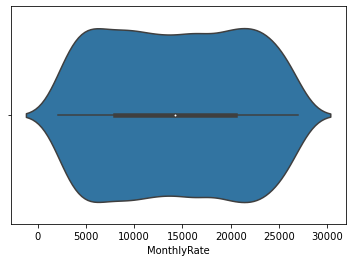

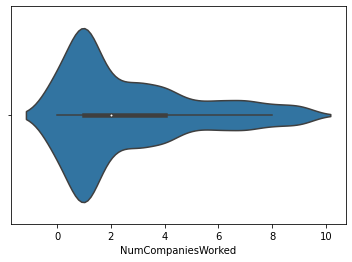

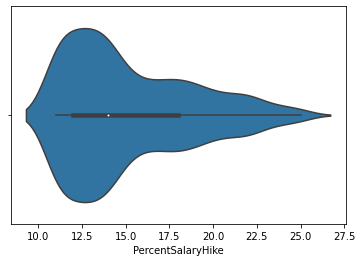

In [529]:
for i in numer_col: 
    sb.violinplot(x = i, data = df)
    plt.show()

Observation: 
    
    We can see that the highest number of people working in the company are in the 30-40 age group.
    
    The Daily rate of employess increases steadily from low to high. 
    
    The highest number of employess stay under 10 Km distance from office, while some goes upto 30 km away. 
    
    The hourly rate also increases steadily from low to high depending on the stages. 
    
    The highest number of people work in the 3000-9000 range of monthly income. 
    
    The monthly rate stays uniform. 
    
    Most number of employess has worked atleast 2 companies before they joined. 
    
    The highest numbre of people got a 12.5% - 16% salary hike. 

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

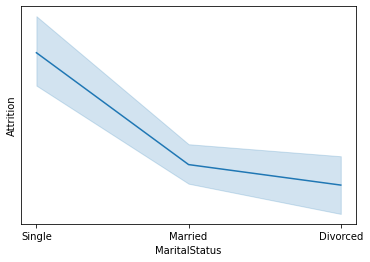

In [530]:
sb.lineplot(x="MaritalStatus", y="Attrition", data=df)

We can see that the highest number of people who got in the Attrition are singles. 

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

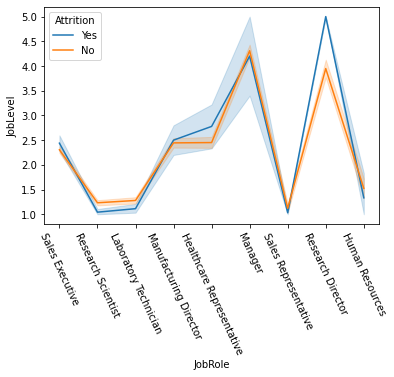

In [531]:
sb.lineplot(x="JobRole", y="JobLevel", hue = 'Attrition', data=df)
plt.xticks(rotation = -65, fontsize = 10)

We can see that the highest number of attrition happend with the level 1 sales representatives, level 5 managers, and level 1 HRs. We can see a good amount of attrition in the Level 1 Lab technicians, and research scientists. 

<AxesSubplot:xlabel='PerformanceRating', ylabel='YearsInCurrentRole'>

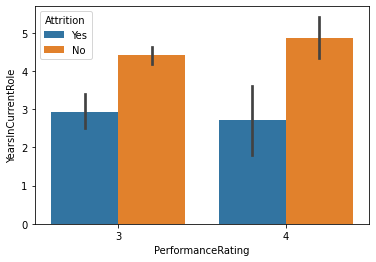

In [532]:
sb.barplot(x = 'PerformanceRating', y ='YearsInCurrentRole', hue = 'Attrition', data = df)

We can see that the total number of years the employee spends in teh current role doesn't change the Attrition rate. 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

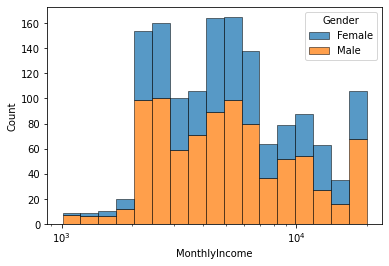

In [533]:
sb.histplot(df,x="MonthlyIncome", hue="Gender", multiple="stack", linewidth=.5, log_scale=True)

We can see that the income for women are higher than that of men. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

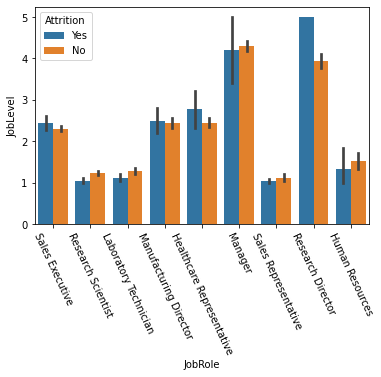

In [534]:
sb.barplot(x="JobRole", y="JobLevel", hue = 'Attrition', data = df)
plt.xticks(rotation = -65, fontsize = 10)

Most of the level 1 and 2 employess are left from Research Scientists, Laborotary Technicians, Sales Representatives and Human Resources. 

Most of the high level employess who left are Managers and Research Directors. 

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

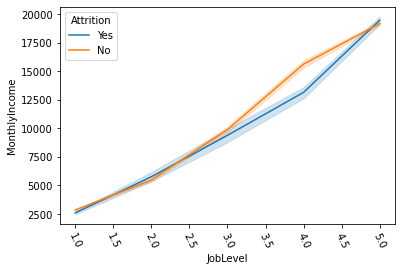

In [535]:
sb.lineplot(x="JobLevel", y="MonthlyIncome", hue = 'Attrition', data = df)
plt.xticks(rotation = -65, fontsize = 10)

Job Level and Monthly Income are directly proportional. The Attrition only has an affect when it crosses the job level 3.

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

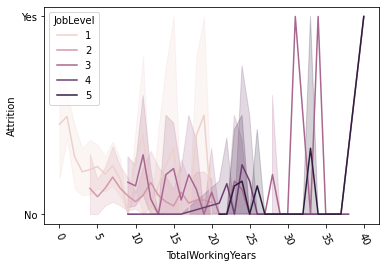

In [536]:
sb.lineplot(x="TotalWorkingYears", y="Attrition", hue = 'JobLevel', data = df)
plt.xticks(rotation = -65, fontsize = 10)

We can see that lower level employees are leaving the company earlier when compared to the higher level employees. 

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

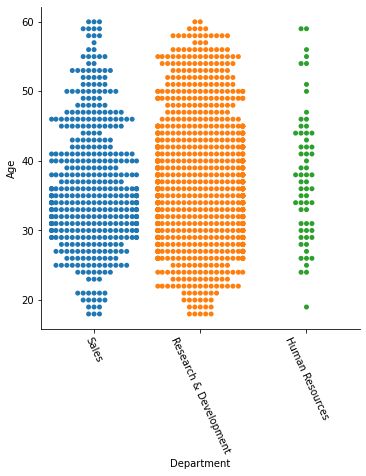

In [537]:
sb.catplot(x="Department", y='Age', data = df, kind="swarm")
plt.xticks(rotation = -65, fontsize = 10)

This plot shows the age distribution of people in the three departments. 

<AxesSubplot:xlabel='Age', ylabel='count'>

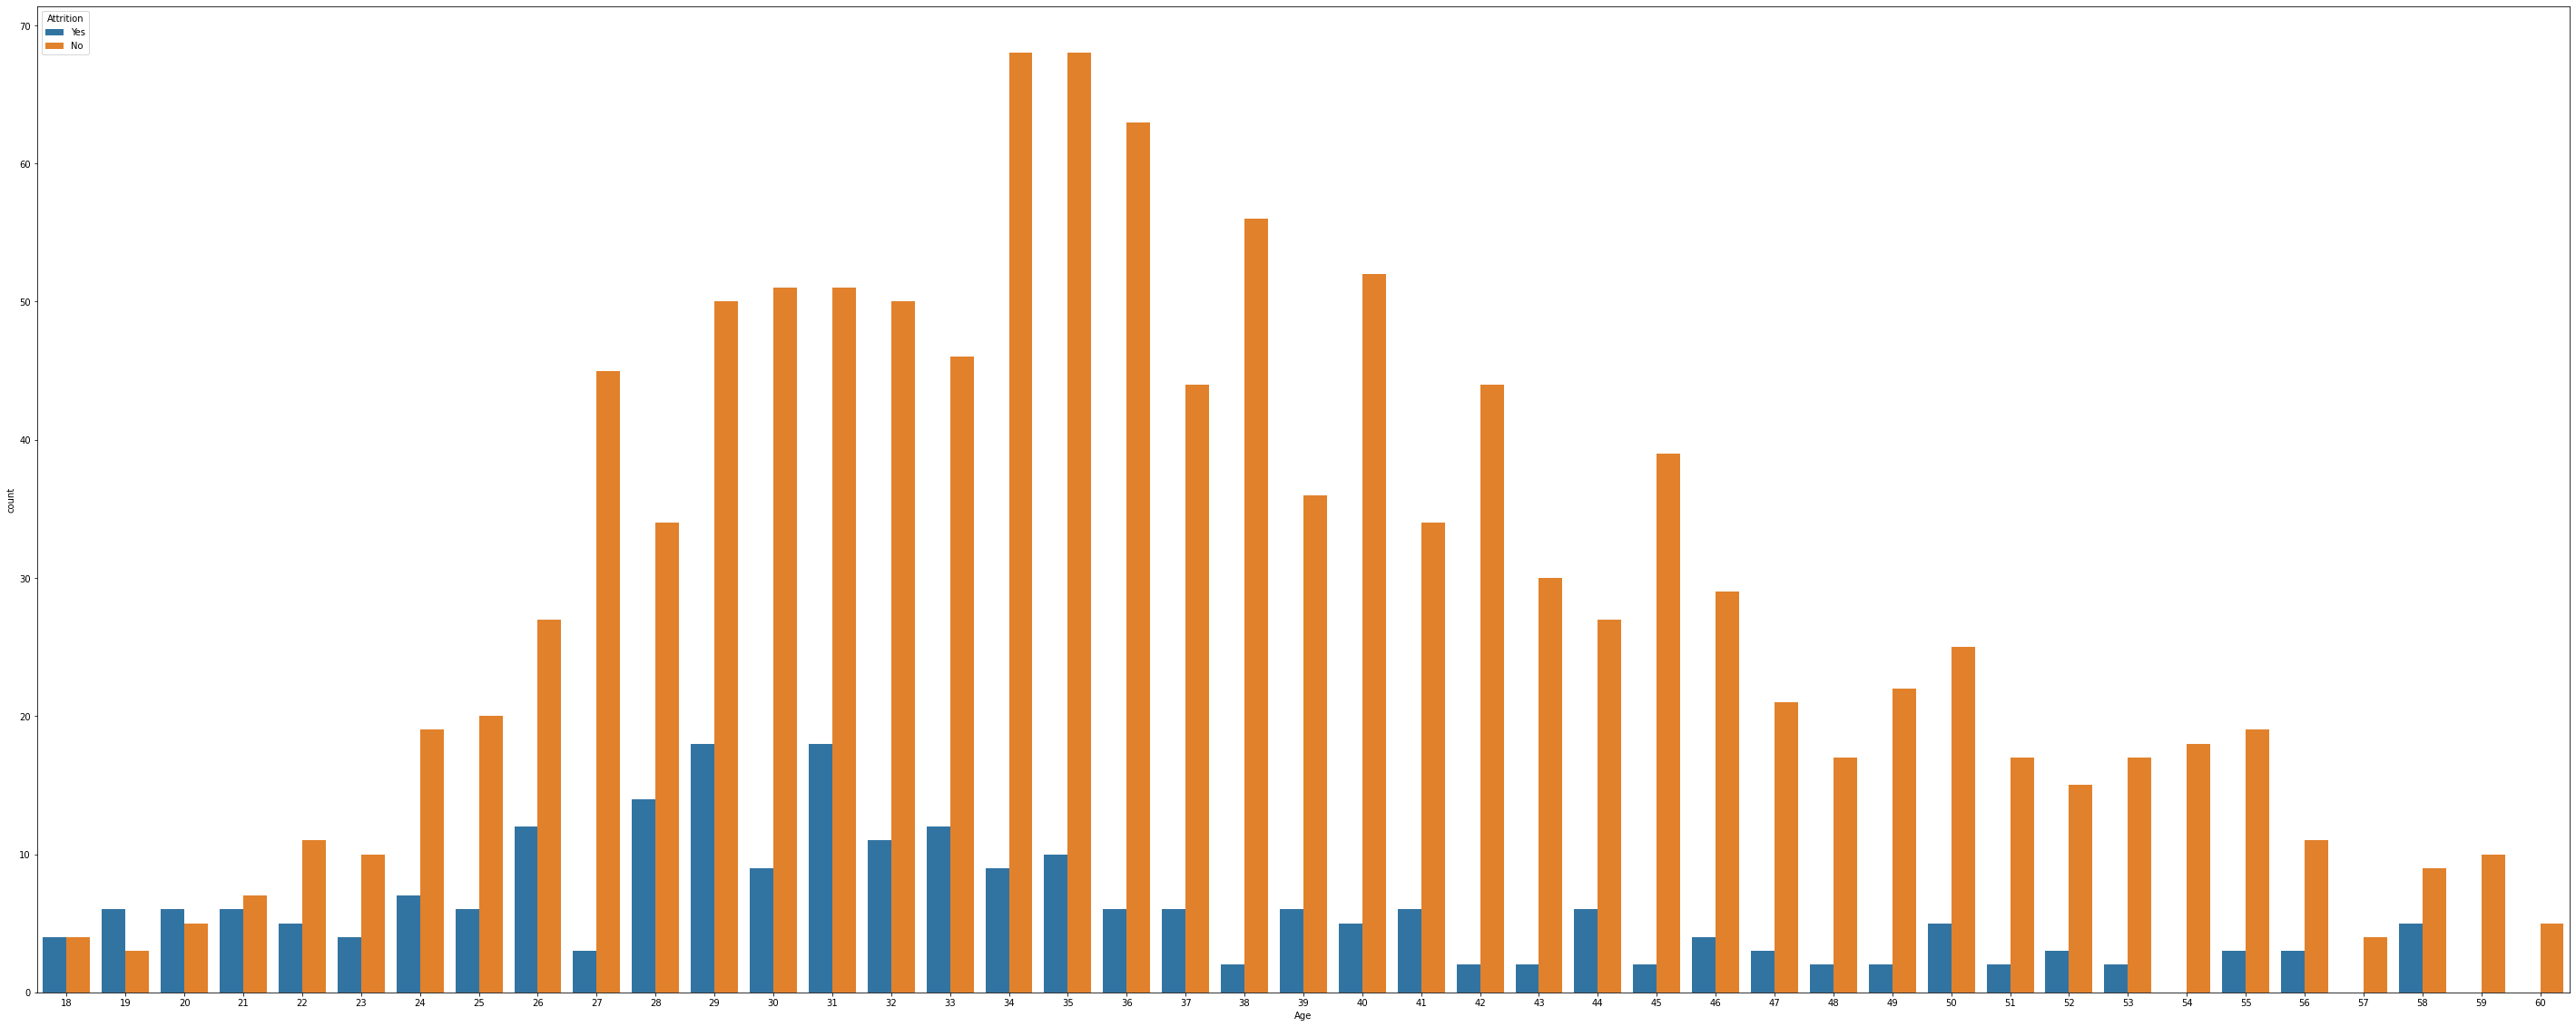

In [538]:
plt.figure(figsize = (50,20))
sb.countplot(x='Age', hue='Attrition', data = df)

We can see that the level of attrition is higher for the ages 18-21, and the lowest for ages 22 - 60

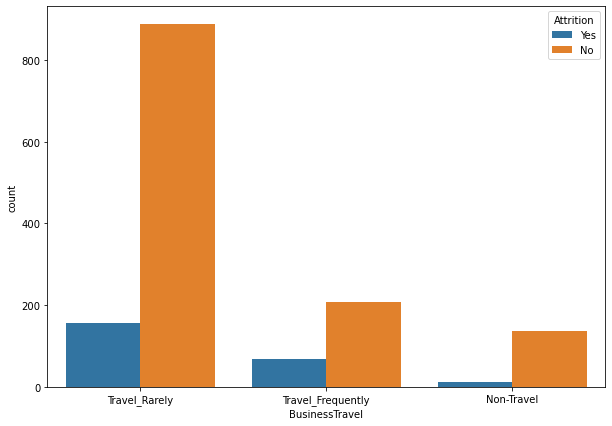

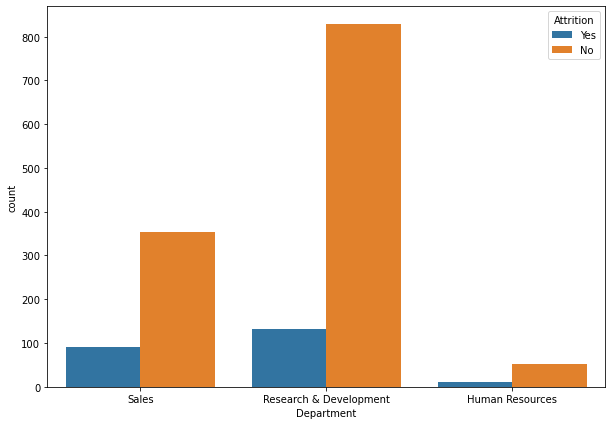

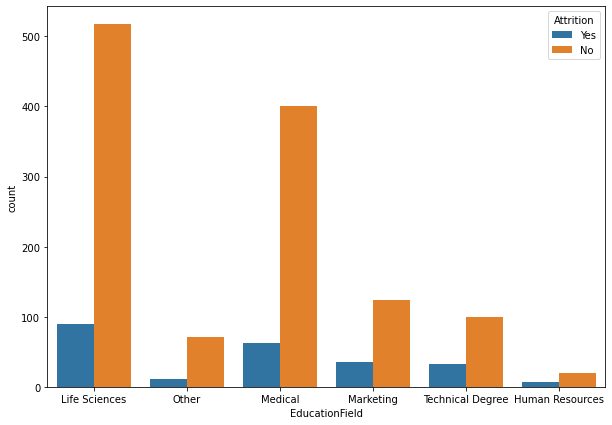

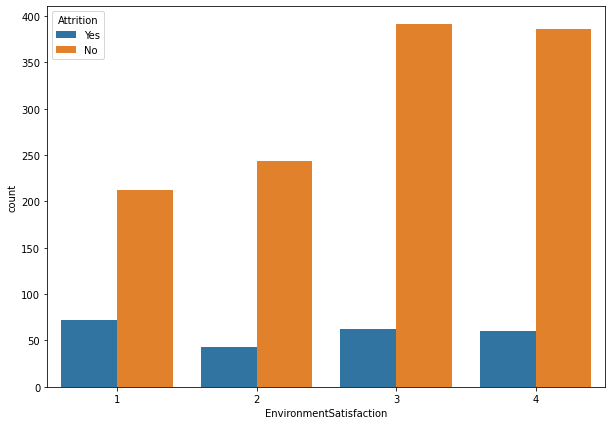

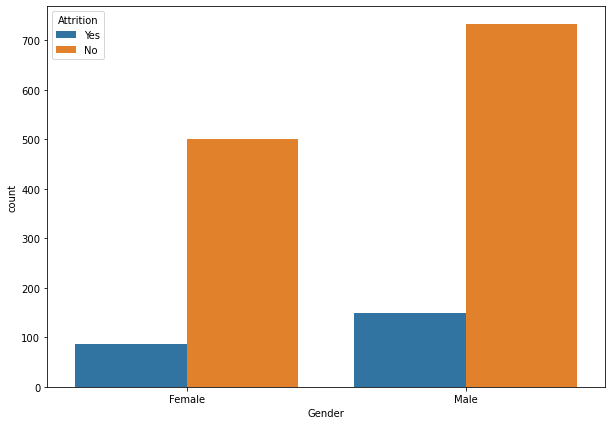

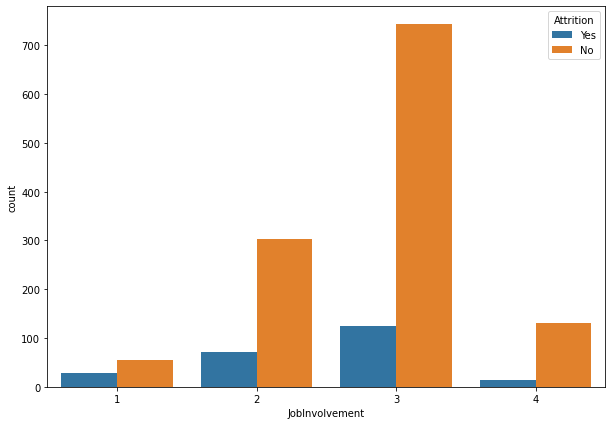

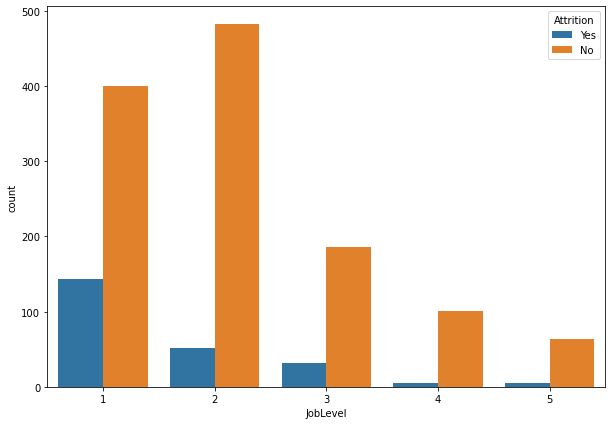

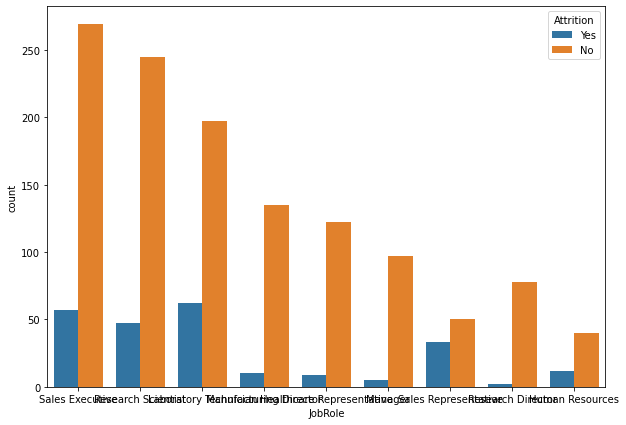

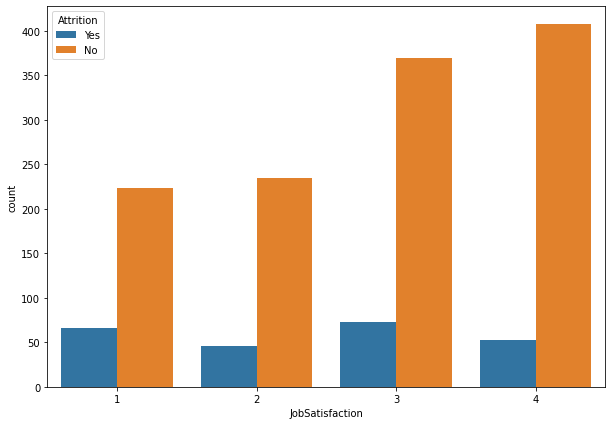

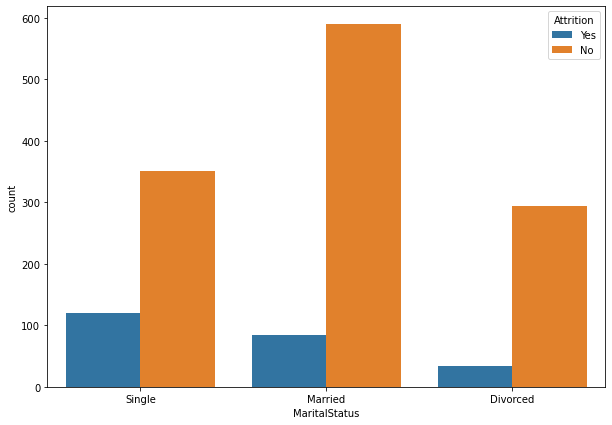

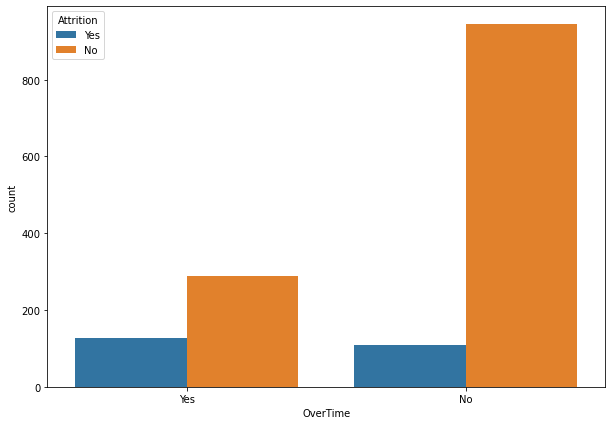

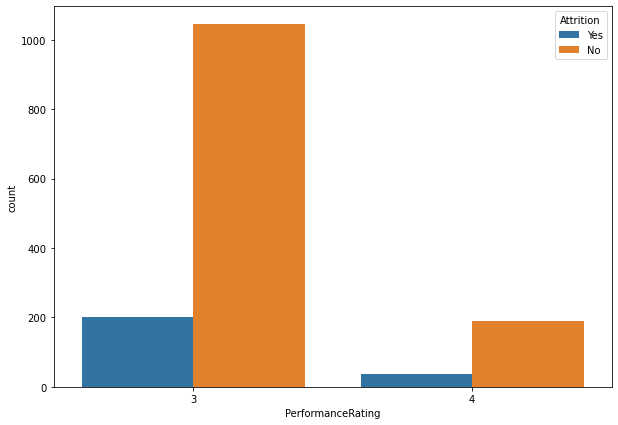

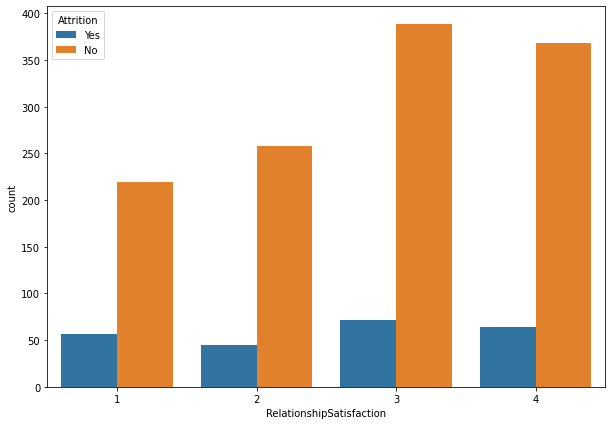

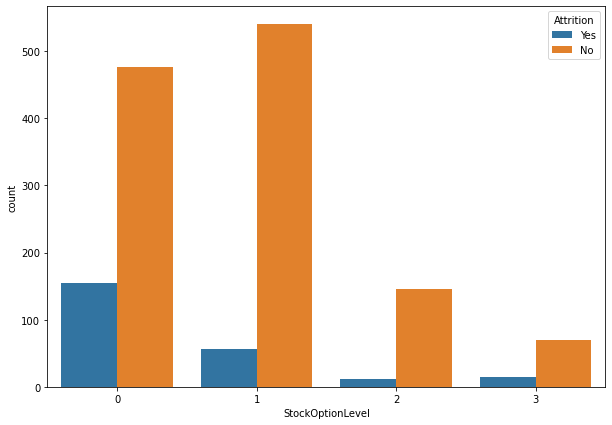

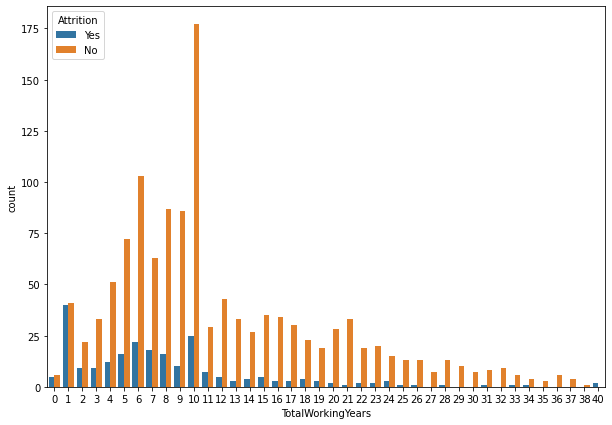

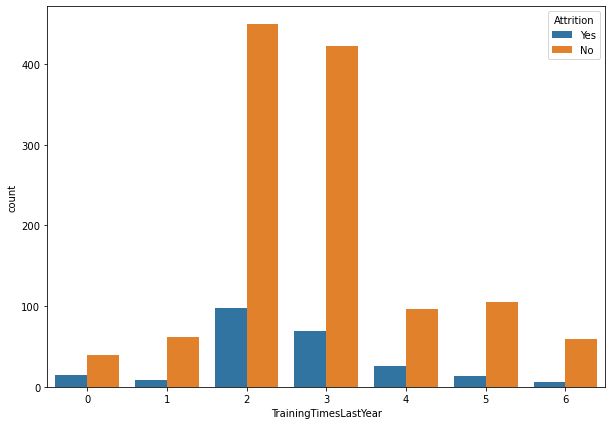

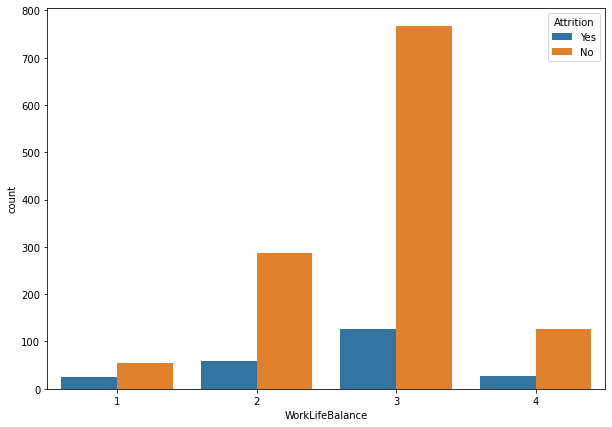

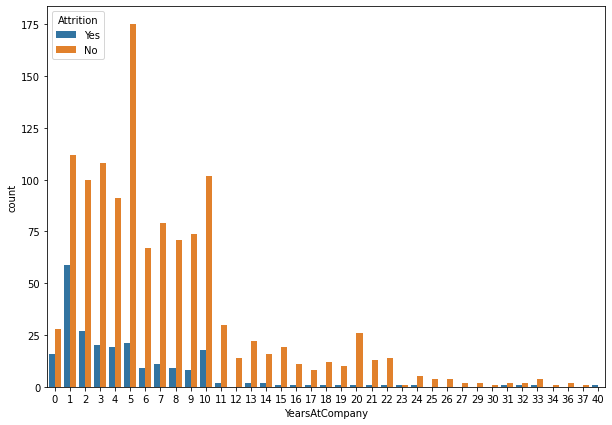

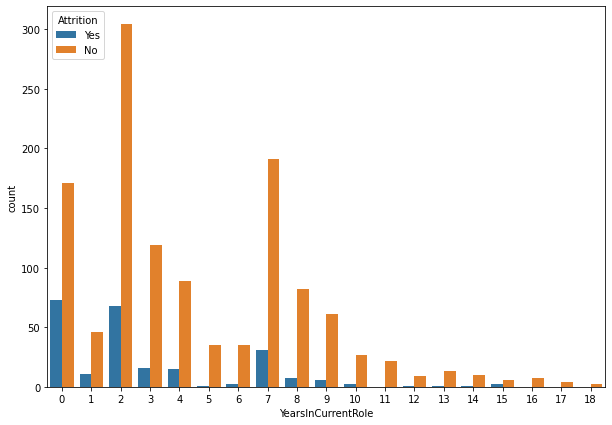

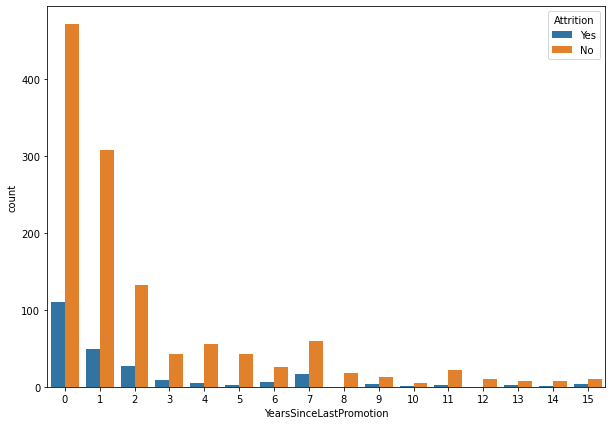

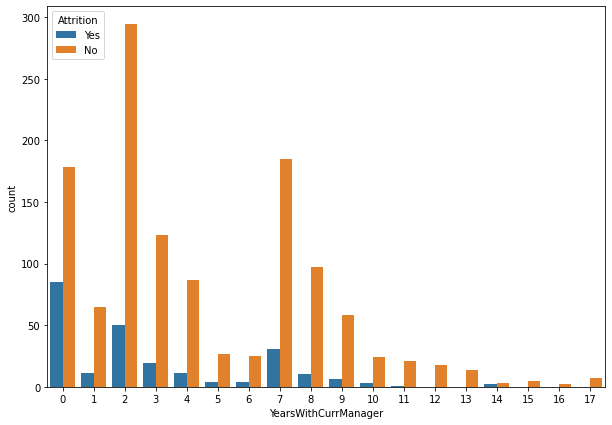

In [539]:
#Categorical data vs attrition. 
temp_col = ['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 
             'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
            'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in temp_col:
    plt.figure(figsize = (10,7))
    sb.countplot(x=i, hue='Attrition', data = df)

The plots above shows the frequency of each category of people leaving the company. 

Observations: 
    
    People who travel rarely tend to stay in the company for longer. 
    
    R&D people stay the longest, compared to HR & Sales the lowest. 
    
    People who are satisfied with the work environment tend to leave earlier for some reason. 
    
    People with the highest job involvement tend to leave soon. 
    
    People in teh higheset job level tend to leave soon. 
    
    Single and Married people tend to change jobs often. 
    
    People who does the most over time work tend to leave soon.  
    
    People tend to leave quickly during their first 0-1 years in the company, and the chances of them staying tends to grown exponentially. 
    
    There are high chances that a person might leave if he do not get a promotion in the first 2 years, but it lowers after 3 years. 

### Summary

In [540]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

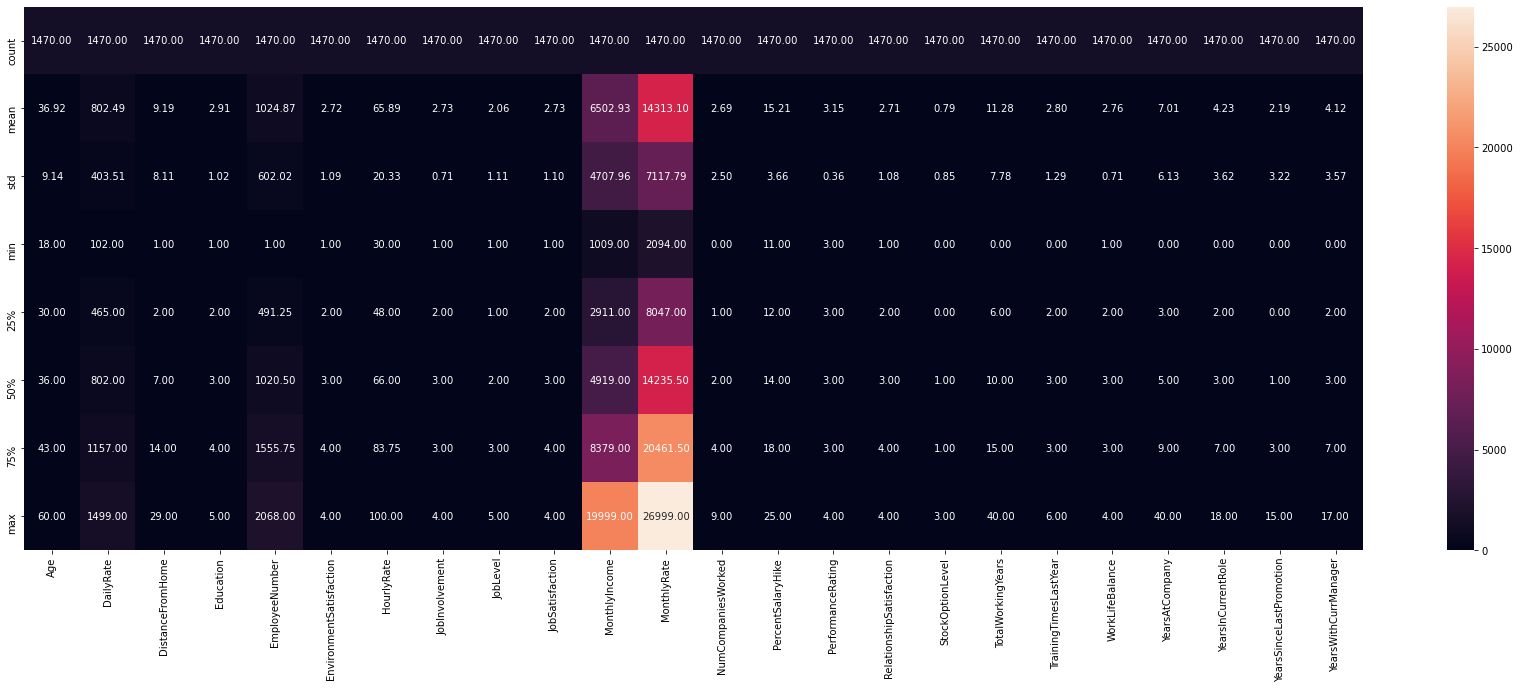

In [541]:
plt.figure(figsize = (30,10))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

We're unable to find any big differences between the mean and max of the values. 

There ain't much difference between the 75th Percentile and max, except for YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager

### Correlation

<AxesSubplot:>

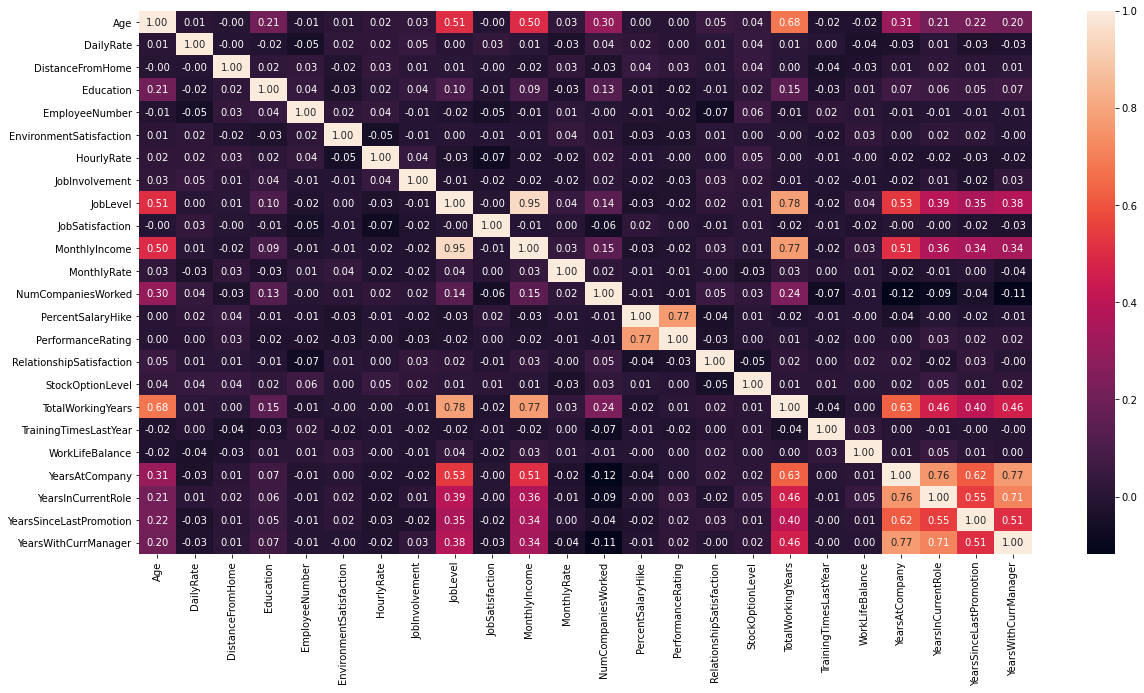

In [542]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

Observation:

        There aren't many negative correlation shown in the graph. 
        
        We can see high correlation for Age with Total Working years, Monnthly Income, and Job Level.
        
        There is High correlation for Job Level with Years At the Company, Total Working Years, Monthly Income, and Age. 
        
        High correlation for Monthly Income with Totak Working years, Years At Company, Job Level, and Age. 
        
        High correlation between Total Working years, Years with current manager, year since last promotion, year in current role, and year at the company. It's also correlated with Monthly income, job level, and age.
        
        High correlation betwee Years since last promotion and Years with the current manager, years in current role and years in the company. 

### Encoding

In [543]:
#Encoding using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [544]:
enc = OrdinalEncoder()

In [545]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [546]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


### Checking for outliers

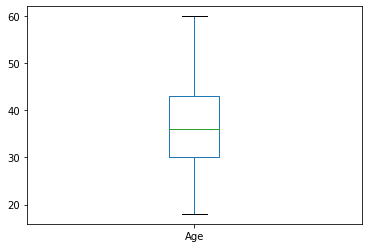

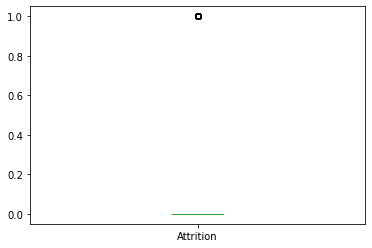

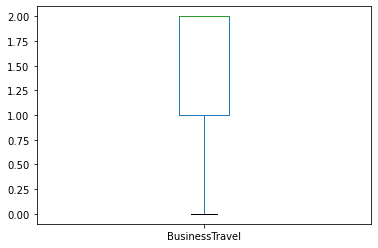

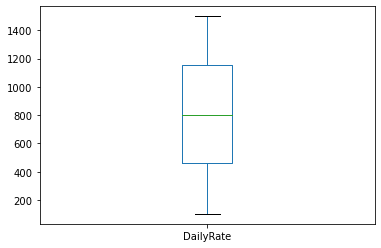

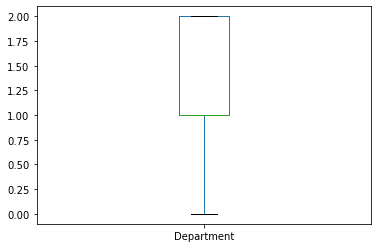

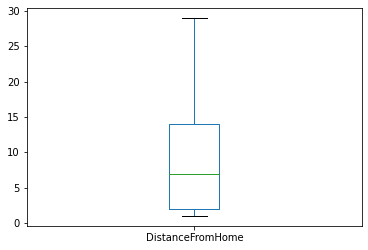

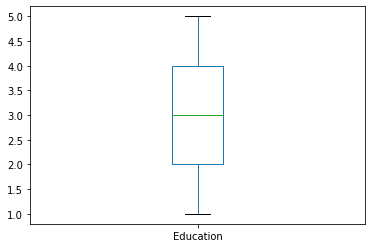

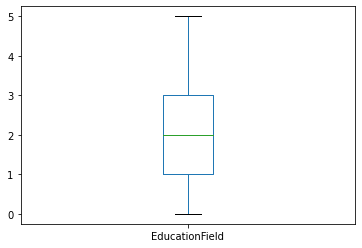

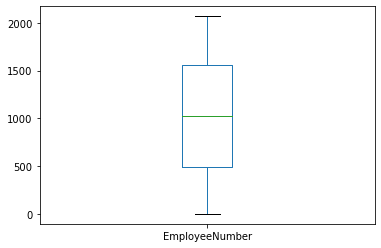

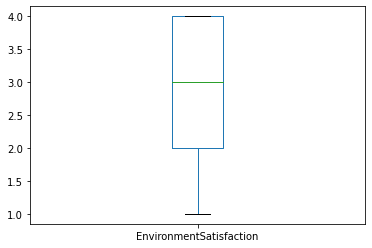

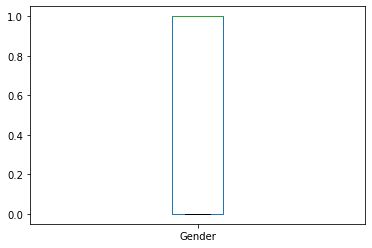

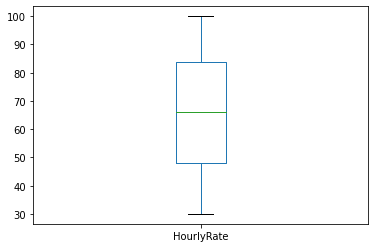

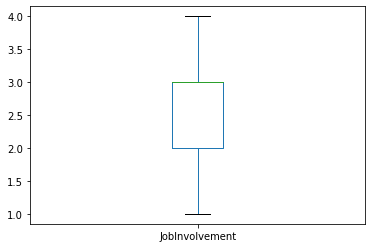

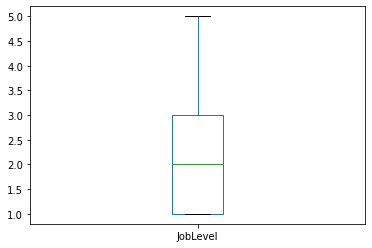

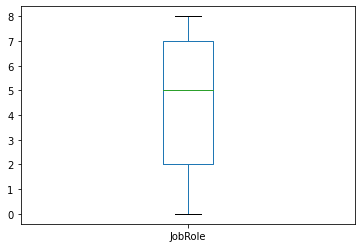

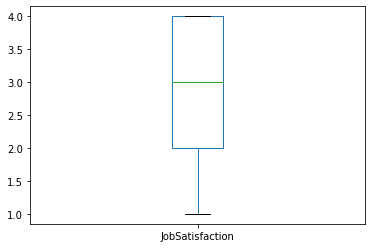

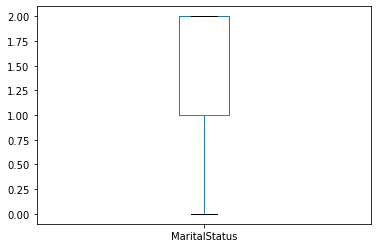

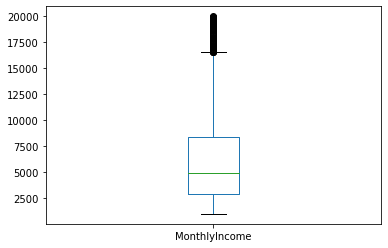

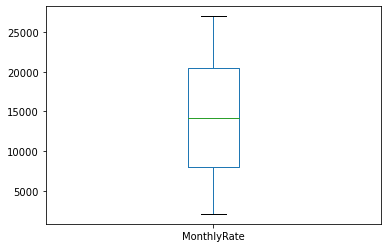

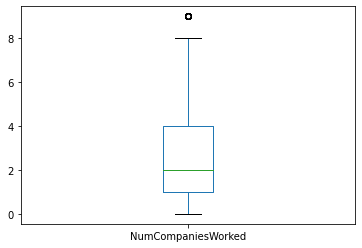

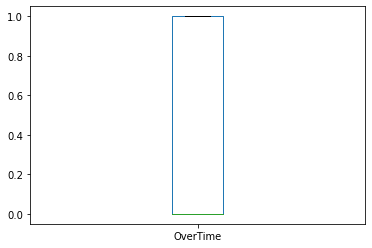

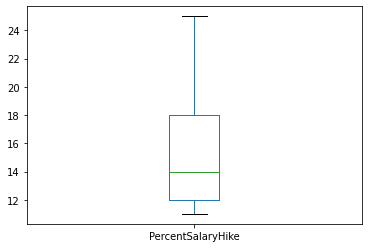

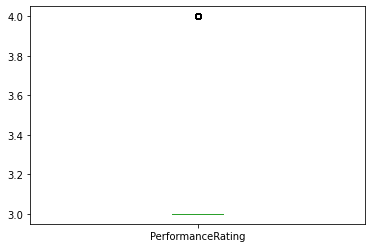

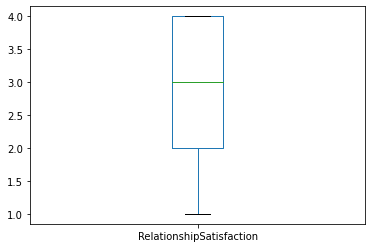

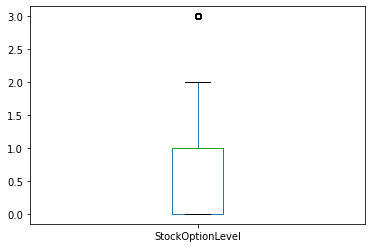

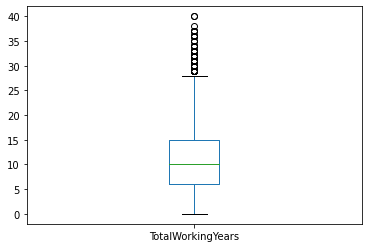

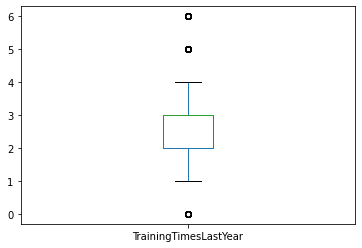

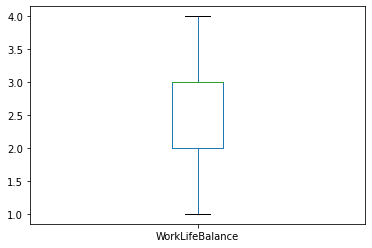

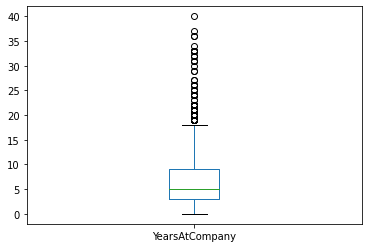

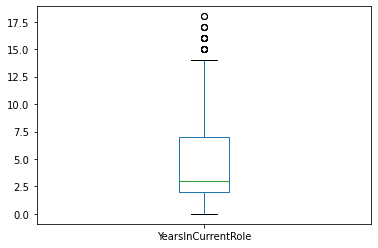

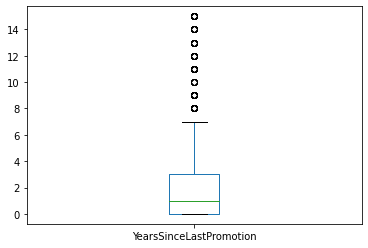

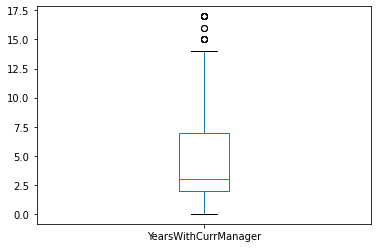

In [547]:
for i in df.columns: 
    df[i].plot.box()
    plt.show()

Observations: 
    
    There will probably be skewness with MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, TrainingTimesLastYear, YearsSinceLastPromotion
    
    These can be ignored. NumCompaniesWorked, PerfomanceRating, StockOptionLevel, YearsWithCurrManager

### Dealing with outliers

In [548]:
from scipy.stats import zscore

In [549]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
        30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
        28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
        25

In [550]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,2061,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,2062,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2064,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,1.0,20,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,2065,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,14,3,4,0,17,3,2,9,6,0,8


In [551]:
df_new.shape

(1387, 32)

In [552]:
#Finding the percentage of dataloss

loss = ((1470-1387)/1470)*100
loss

5.646258503401361

Since there is only 5.6% data loss, we can proceed to remove this data. 

In [553]:
df = df_new

In [554]:
cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

### Splitting X and Y

In [555]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [556]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


In [557]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

### Scaling

In [558]:
from sklearn.preprocessing import StandardScaler

In [559]:
ss = StandardScaler()

In [560]:
x = ss.fit_transform(x)

In [561]:
df = pd.DataFrame(df, columns = cols)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


### Checking for skewness

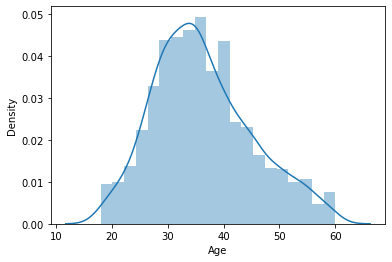

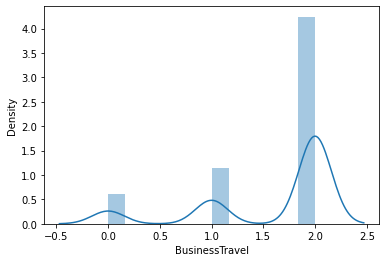

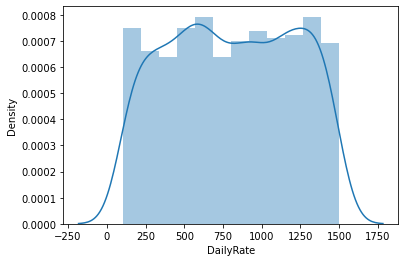

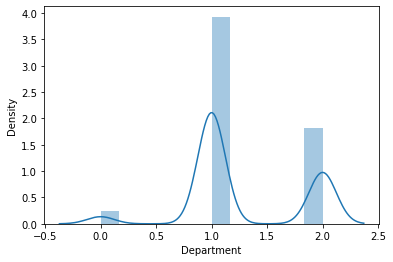

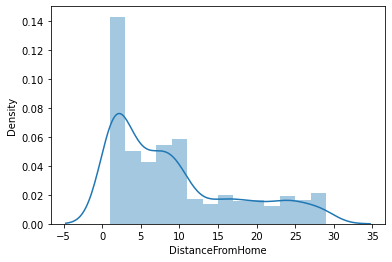

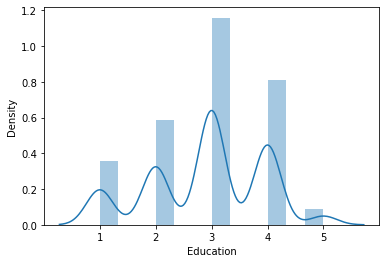

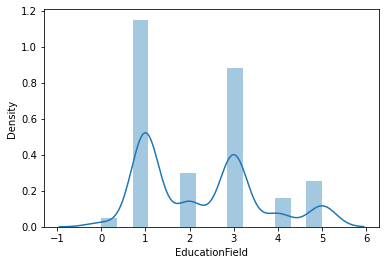

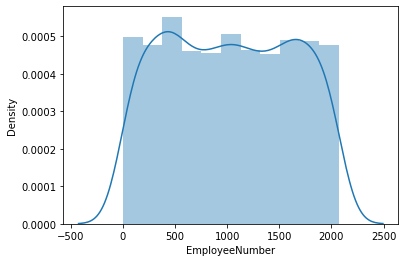

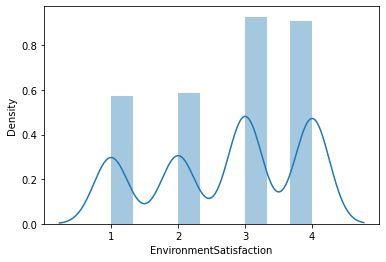

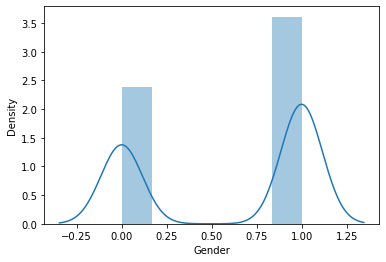

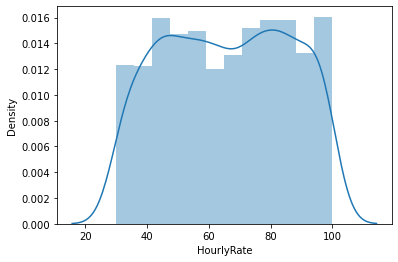

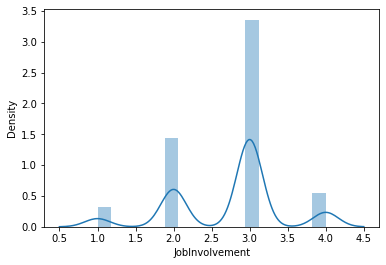

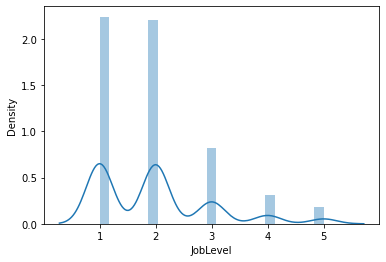

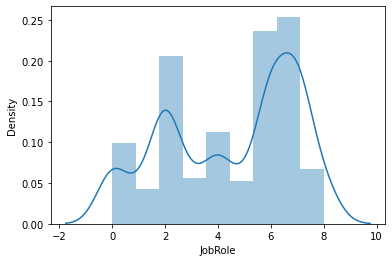

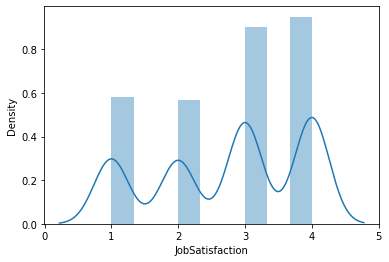

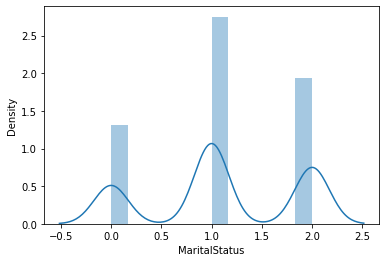

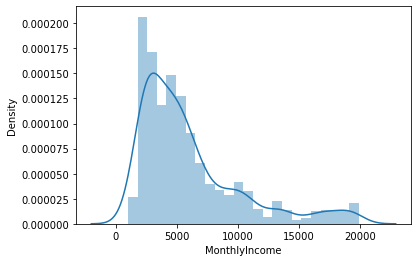

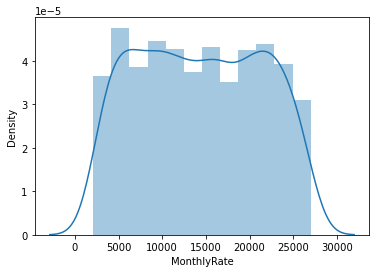

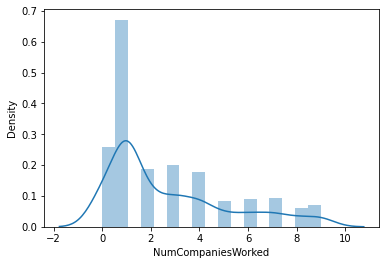

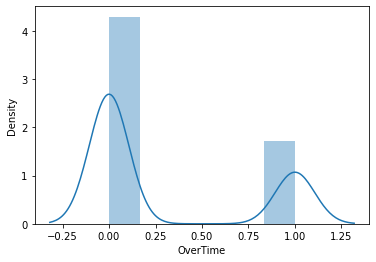

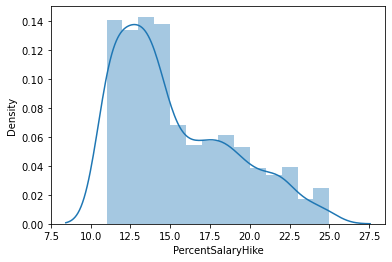

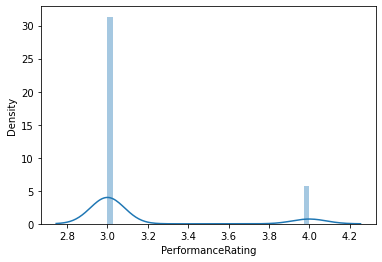

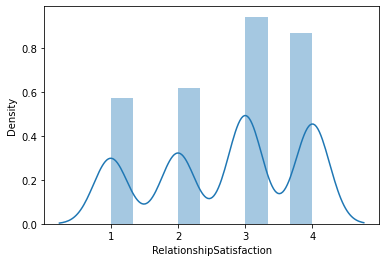

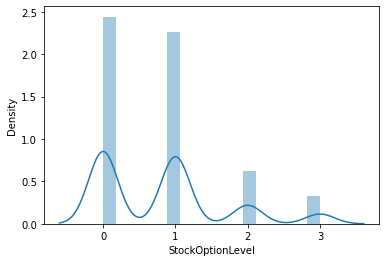

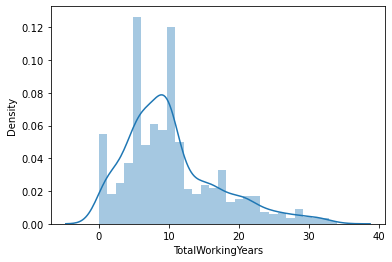

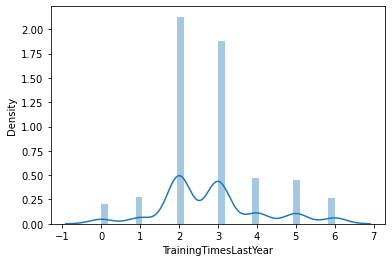

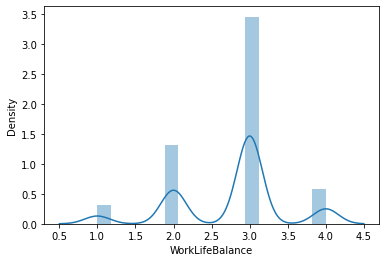

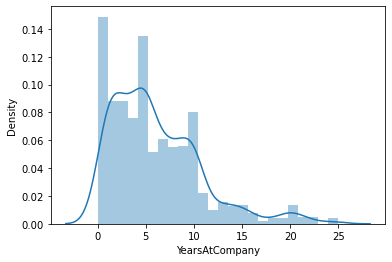

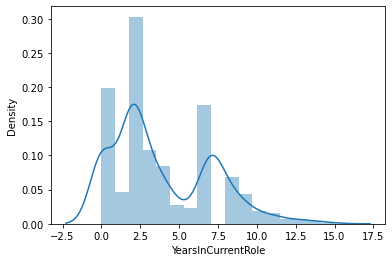

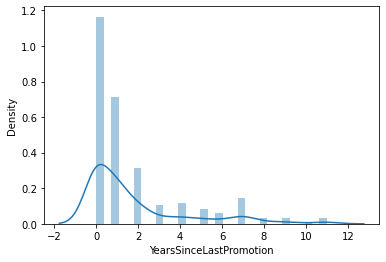

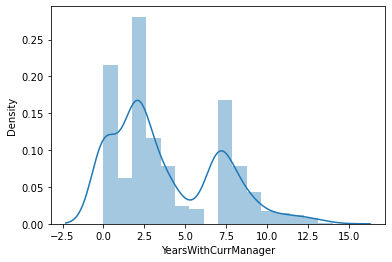

In [562]:
for i in cols: 
    sb.distplot(df[i], kde = True)
    plt.show()

MonthlyIncome, YearSinceLastPromotion are the only two columns with skewness. 

In [563]:
df.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

### Handling the skewness

In [564]:
skew_cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [565]:
from sklearn.preprocessing import PowerTransformer

In [566]:
pt = PowerTransformer(method='yeo-johnson')

In [572]:
for i in skew_cols:
    x = pt.fit_transform(x)

In [573]:
x = pd.DataFrame(x, columns = cols)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.638730,0.750615,1.379881,-1.489968,-0.902402,-0.965129,-2.167233,-0.712215,-1.229911,1.359498,0.322170,0.349828,1.017588,1.186326,1.231767,0.386674,0.755974,1.620671,1.584737,-1.495549,0.0,-1.524369,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.380776,-1.343372,-0.473500,0.244561,-1.759177,-0.965129,-2.157256,0.204826,0.813067,-0.208763,-1.065841,0.349828,0.596961,-0.725589,-0.142549,0.144235,1.410991,-0.561880,-0.631019,1.690425,0.0,1.235448,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,0.182486,0.638730,1.337080,-0.473500,-1.028366,-0.902402,1.239552,-2.139969,1.210036,0.813067,1.267832,-1.065841,-1.141761,-1.022696,0.181993,1.231767,-1.431153,-1.910035,1.273711,1.584737,0.193797,0.0,-0.690386,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,-1.380776,1.377080,-0.473500,-0.698191,1.102042,-0.965129,-2.132165,1.210036,-1.229911,-0.458919,0.322170,-1.141761,0.596961,0.181993,-0.142549,-0.814425,1.205093,-0.561880,1.584737,-1.495549,0.0,0.235192,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,0.638730,-0.467301,-0.473500,-1.028366,-1.759177,0.689982,-2.117665,-1.522916,0.813067,-1.290538,0.322170,-1.141761,-1.022696,-0.725589,-0.142549,-0.504453,0.391227,1.764103,-0.631019,-0.957525,0.0,1.235448,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


In [574]:
#Checking the skewness once again
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EmployeeNumber             -0.287518
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
Y

Most of the columns are categorical, hence the skewness isn't making much difference. 

### Importing the models

In [575]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()

In [576]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 50)

In [577]:
x_train.shape

(970, 31)

In [578]:
x_test.shape

(417, 31)

In [579]:
y_train.shape

(970,)

In [580]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  LogisticRegression()
0.86810551558753
[[330  13]
 [ 42  32]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       343
         1.0       0.71      0.43      0.54        74

    accuracy                           0.87       417
   macro avg       0.80      0.70      0.73       417
weighted avg       0.86      0.87      0.85       417

Accuracy Score  :  GaussianNB()
0.7985611510791367
[[298  45]
 [ 39  35]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       343
         1.0       0.44      0.47      0.45        74

    accuracy                           0.80       417
   macro avg       0.66      0.67      0.67       417
weighted avg       0.80      0.80      0.80       417

Accuracy Score  :  SVC()
0.8465227817745803
[[337   6]
 [ 58  16]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       343
         1.0    

### Cross Validation

In [581]:
from sklearn.model_selection import cross_val_score

In [582]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model:
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')
    

LogisticRegression()
[0.8608470460055475, 0.8622837445731615, 0.868064000266529, 0.8687816533776589, 0.8716537294123502, 0.872366884929699, 0.8694895687994153, 0.8716473490667038]
CV Value =  7
Best Score = 0.872366884929699


GaussianNB()
[0.7829707116450633, 0.8103606256953988, 0.8176109010344655, 0.8146949588343766, 0.8146862715828233, 0.8168584625871059, 0.8168352601156069, 0.8125215286505609]
CV Value =  4
Best Score = 0.8176109010344655


SVC()
[0.8579641619987441, 0.8594086499054101, 0.8608510602855192, 0.8615770199724697, 0.8601283773697567, 0.863727004430522, 0.8615748123048302, 0.8622818042172881]
CV Value =  7
Best Score = 0.863727004430522


RandomForestClassifier()
[0.8558027787134416, 0.850758432831867, 0.8514767370192068, 0.851479105524245, 0.8500429168532616, 0.855801373389313, 0.8529292073616371, 0.8521947586463716]
CV Value =  2
Best Score = 0.8558027787134416


DecisionTreeClassifier()
[0.5495693867451792, 0.7656696555184676, 0.7779272375939098, 0.7765083240266992, 0

### Re-doing the best model

In [583]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy score: 
0.86810551558753
[[330  13]
 [ 42  32]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       343
         1.0       0.71      0.43      0.54        74

    accuracy                           0.87       417
   macro avg       0.80      0.70      0.73       417
weighted avg       0.86      0.87      0.85       417



### AUC-ROC Curve

In [585]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [587]:
y_pred_prob = lr.predict_proba(x_test)[:, 0]

In [588]:
y_pred_prob

array([0.9856915 , 0.99860259, 0.99908277, 0.69947295, 0.99707262,
       0.98691744, 0.83403489, 0.83904583, 0.90453957, 0.84893384,
       0.80536996, 0.87053839, 0.69667546, 0.97561023, 0.94278564,
       0.97923848, 0.16733479, 0.80956811, 0.98321401, 0.70375943,
       0.97849825, 0.98594701, 0.78533961, 0.71164224, 0.89006831,
       0.99898881, 0.85803777, 0.92624127, 0.98201522, 0.96718537,
       0.97871937, 0.98874896, 0.97678461, 0.15937081, 0.96408204,
       0.67533994, 0.72555565, 0.50662882, 0.89100391, 0.98055578,
       0.99806126, 0.9033361 , 0.98875855, 0.99520574, 0.49591135,
       0.40019001, 0.92620267, 0.89927089, 0.94945725, 0.74649648,
       0.28166972, 0.86718366, 0.85400642, 0.97836786, 0.98653597,
       0.87073761, 0.96778714, 0.73168354, 0.97980224, 0.96823388,
       0.99667806, 0.75164074, 0.95285183, 0.61732394, 0.85673459,
       0.99270233, 0.91033624, 0.97175358, 0.57835577, 0.96521096,
       0.95526511, 0.98685422, 0.97698485, 0.42544602, 0.86056

In [589]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [590]:
fpr

array([0.        , 0.00291545, 0.03790087, 0.03790087, 0.07580175,
       0.07580175, 0.14285714, 0.14285714, 0.21865889, 0.21865889,
       0.24489796, 0.24489796, 0.34402332, 0.34402332, 0.36443149,
       0.36443149, 0.41399417, 0.41399417, 0.42565598, 0.42565598,
       0.44897959, 0.44897959, 0.56559767, 0.56559767, 0.61516035,
       0.61516035, 0.6180758 , 0.6180758 , 0.64723032, 0.64723032,
       0.6851312 , 0.6851312 , 0.72594752, 0.72594752, 0.77842566,
       0.77842566, 0.79008746, 0.79008746, 0.79591837, 0.79591837,
       0.80466472, 0.80466472, 0.82798834, 0.82798834, 0.86880466,
       0.86880466, 0.87463557, 0.87463557, 0.88046647, 0.88046647,
       0.89504373, 0.89504373, 0.89795918, 0.89795918, 0.90379009,
       0.90379009, 0.90670554, 0.90670554, 0.9154519 , 0.9154519 ,
       0.9212828 , 0.9212828 , 0.93877551, 0.93877551, 0.95043732,
       0.95043732, 0.96209913, 0.96209913, 0.96501458, 0.96501458,
       0.97084548, 0.97084548, 0.97667638, 0.97667638, 0.98250

In [591]:
tpr

array([0.        , 0.        , 0.        , 0.01351351, 0.01351351,
       0.02702703, 0.02702703, 0.04054054, 0.04054054, 0.05405405,
       0.05405405, 0.06756757, 0.06756757, 0.08108108, 0.08108108,
       0.09459459, 0.09459459, 0.10810811, 0.10810811, 0.12162162,
       0.12162162, 0.13513514, 0.13513514, 0.14864865, 0.14864865,
       0.16216216, 0.16216216, 0.17567568, 0.17567568, 0.18918919,
       0.18918919, 0.2027027 , 0.2027027 , 0.21621622, 0.21621622,
       0.22972973, 0.22972973, 0.24324324, 0.24324324, 0.25675676,
       0.25675676, 0.27027027, 0.27027027, 0.28378378, 0.28378378,
       0.2972973 , 0.2972973 , 0.31081081, 0.31081081, 0.32432432,
       0.32432432, 0.36486486, 0.36486486, 0.39189189, 0.39189189,
       0.40540541, 0.40540541, 0.45945946, 0.45945946, 0.47297297,
       0.47297297, 0.5       , 0.5       , 0.54054054, 0.54054054,
       0.55405405, 0.55405405, 0.56756757, 0.56756757, 0.58108108,
       0.58108108, 0.59459459, 0.59459459, 0.66216216, 0.66216

In [592]:
thresholds

array([1.99946542, 0.99946542, 0.99806126, 0.99799372, 0.99649166,
       0.99645439, 0.99252384, 0.99238887, 0.98700727, 0.98691744,
       0.98594701, 0.98581561, 0.9786085 , 0.9785908 , 0.97769108,
       0.97750408, 0.96826571, 0.96823388, 0.96678363, 0.9662758 ,
       0.96114099, 0.96082467, 0.94178043, 0.93945471, 0.92620267,
       0.92602116, 0.92385314, 0.9226363 , 0.90833881, 0.90541382,
       0.8883708 , 0.88834568, 0.86521591, 0.86330839, 0.8307148 ,
       0.83033455, 0.81645125, 0.81441579, 0.81199022, 0.81000158,
       0.80621572, 0.80536996, 0.78634906, 0.78600042, 0.74649648,
       0.74076686, 0.73168354, 0.7315679 , 0.71797691, 0.71731906,
       0.70375943, 0.69667546, 0.69296171, 0.6878917 , 0.67782317,
       0.67598253, 0.67533994, 0.64528941, 0.63440116, 0.63215868,
       0.62916119, 0.62013878, 0.57835577, 0.55875076, 0.51708283,
       0.51281294, 0.50233035, 0.502002  , 0.49591135, 0.49482048,
       0.45785741, 0.45032398, 0.42590862, 0.40019001, 0.38111

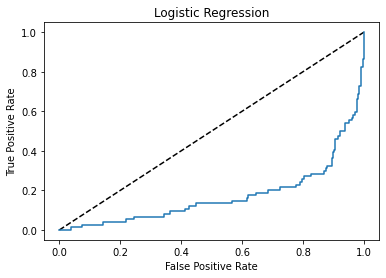

In [593]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [597]:
auc_score = roc_auc_score(y_test, lr.predict(x_test))

In [598]:
print(auc_score)

0.697265778898432


### GridSearchCV

In [600]:
from sklearn.model_selection import GridSearchCV

In [601]:
parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr = LogisticRegression()
lrcv = GridSearchCV(lr, parameters)
lrcv.fit(x_train, y_train)

print(lrcv.best_params_)

{'C': 1, 'penalty': 'l2'}


In [604]:
lr_final = LogisticRegression(C = 1, penalty = 'l2')
lr_final.fit(x_train, y_train)
pred_lr = lr_final.predict(x_test)
print('Accuracy Score  : ', lr_final)
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Accuracy Score  :  LogisticRegression(C=1)
0.86810551558753
[[330  13]
 [ 42  32]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       343
         1.0       0.71      0.43      0.54        74

    accuracy                           0.87       417
   macro avg       0.80      0.70      0.73       417
weighted avg       0.86      0.87      0.85       417



We're getting 86% accuracy.

In [605]:
data = [pred_lr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Actual,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,

### Creating OBJ File

In [606]:
import joblib

In [608]:
joblib.dump(lr_final, 'HR_Attrition.obj')

['HR_Attrition.obj']

### Conclusion

In [609]:
final = joblib.load('HR_Attrition.obj')
final.predict(x_train)

array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [610]:
conclusion = pd.DataFrame([final.predict(x_test)[:], pred_lr[:]], index = ['Predicted', 'Original'])

In [611]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Original,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.